
# <center><span style='background:blue'>Segmentez des clients d'un site e-commerce (partie 2)</span></center>
=========================================================================================================================

## Table of Contents <a class="anchor" id="sommaire"></a>

* [Calcul du rfm score](#00)
* [KMeans](#1)

    * [Application sur les données (Recency, Frequency, Monetary)](#1_1)
        * [Visualisation des Elbow_score](#1_1_1)
        * [Visualisation des Silhouette_scores](#1_1_2)
        * [Visualisation des Silhouette_scores des clusters](#1_1_3)
        * [Visualisation du InterclusterDistance](#1_1_4)
        * [Visualisation des clusters en 1d](#1_1_5)
        * [Visualisation des clusters en 2d](#1_1_6)
        * [Visualisation des clusters en 3d](#1_1_7)
        
    * [Application sur les données (Recency, Frequency, Monetary, Review_score)](#1_2)
        * [Visualisation des Elbow_score](#1_2_1)
        * [Visualisation des Silhouette_scores](#1_2_2)
        * [Visualisation des Silhouette_scores des clusters](#1_2_3)
        * [Visualisation du InterclusterDistance](#1_2_4)
        * [Visualisation des clusters en 1d](#1_2_5)
        * [Visualisation des clusters en 2d](#1_2_6)
        * [Visualisation des clusters en 3d](#1_2_7)
        
    * [Application sur les données (Recency, Frequency, Monetary, Review_score, N_products)](#1_3)
        * [Visualisation des Elbow_score](#1_3_1)
        * [Visualisation des Silhouette_scores](#1_3_2)
        * [Visualisation des Silhouette_scores des clusters](#1_3_3)
        * [Visualisation du InterclusterDistance](#1_3_4)
        * [Visualisation des clusters en 1d](#1_3_5)
        * [Visualisation des clusters en 2d](#1_3_6)
        * [Visualisation des clusters en 3d](#1_3_7)        
        
    * [Application sur les données (log(Recency), log(Frequency), log(Monetary))](#1_4)
        * [Visualisation des Elbow_score](#1_4_1)
        * [Visualisation des Silhouette_scores](#1_4_2)
        * [Visualisation des Silhouette_scores des clusters](#1_4_3)
        * [Visualisation du InterclusterDistance](#1_4_4)
        * [Visualisation des clusters en 1d](#1_4_5)
        * [Visualisation des clusters en 2d](#1_4_6)
        * [Visualisation des clusters en 3d](#1_4_7)
* [DBSCAN](#2)
    * [Application sur les données (Recency, Frequency, Monetary)](#2_1)
        * [Visualisation des clusters en 1d](#2_1_4)
        * [Visualisation des clusters en 2d](#2_1_5)
        * [Visualisation des clusters en 3d](#2_1_7) 
        
* [AgglomerativeClustering](#3)
    * [Application sur les données (Recency, Frequency, Monetary)](#3_1))
        * [Visualisation des clusters en 1d](#3_1_4)
        * [Visualisation des clusters en 2d](#3_1_5)
        * [Visualisation des clusters en 3d](#3_1_7)
        
* [Choix du modèle](#4)
    * [Comparaison de la silhouette score de chaque modèle](#4_1)
    * [Comparaison de la silhouette score des clusters de chaque modèle](#4_2)
    * [Stabilité du modèle optimal](#4_3)

# Calcul du rfm score <a class="anchor" id="00"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

t_init = time()

%store -r

In [2]:
rfm

customer_unique_id  Recency  Frequency  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19
2      0000f46a3911fa3c0805444483337064      586          1     86.22
3      0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62
4      0004aac84e0df4da2b147fca70cf8255      337          1    196.89
...                                 ...      ...        ...       ...
95374  fffcf5a5ff07b0908bd4e2dbc735a684      496          1   2067.42
95375  fffea47cd6d3cc0a88bd621562a9d061      311          1     84.58
95376  ffff371b4d645b6ecea244b27531430a      618          1    112.46
95377  ffff5962728ec6157033ef9805bacc48      169          1    133.69
95378  ffffd2657e2aad2907e67c3e9daecbeb      533          1     71.56

[95379 rows x 4 columns]

In [3]:
# Calcul des coefficients R F M
quantiles = rfm[['Recency', 'Monetary']].quantile([0.2,0.4,0.6,0.8])

def r_score(x):
    """fonction qui calcule le score d'un élement de la variable 'Recency'
    
    Attrs:
    ------
        - x (float): un élément de la variable 'Recency'
        
    Returns:
    --------
        - un nombre 'int' entre 1 et 5
    """

    if x <= quantiles['Recency'][0.2]:
        return 5
    elif x <= quantiles['Recency'][0.4]:
        return 4
    elif x <= quantiles['Recency'][0.6]:
        return 3
    elif x <= quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

def f_score(x):
    """fonction qui calcule le score d'un élement de la variable 'Frequency'
    
    Attrs:
    ------
        - x (float): un élément de la variable 'Frequency'
        
    Returns:
    --------
        - un nombre 'int' entre 1 et 3
    """
        
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

def m_score(x):
    """fonction qui calcule le score d'un élement de la variable 'Monetary'
    
    Attrs:
    ------
        - x (float): un élément de la variable 'Monetary'
        
    Returns:
    --------
        - un nombre 'int' entre 1 et 5
    """
    if x <= quantiles['Monetary'][.2]:
        return 1
    elif x <= quantiles['Monetary'][.4]:
        return 2
    elif x <= quantiles['Monetary'][.6]:
        return 3
    elif x <= quantiles['Monetary'][.8]:
        return 4
    else:
        return 5 
    
rfm['R_score'] = rfm['Recency'].apply(r_score)
rfm['F_score'] = rfm['Frequency'].apply(f_score)
rfm['M_score'] = rfm['Monetary'].apply(m_score)
rfm['RFM_group'] = rfm.R_score.astype(str) + rfm.F_score.astype(str) + rfm.M_score.astype(str)
rfm['RFM_score'] = rfm.R_score+rfm.F_score+rfm.M_score
rfm['Segment'] = pd.qcut(rfm.RFM_score, q = 5, labels=['Group1', 'Group2', 'Group3', 'Group4', 'Group5'])
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      586          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89        2   

   F_score  M_score RFM_group  RFM_score Segment  
0        1        4       414          9  Group4  
1        1        1       411          6  Group2  
2        1        2       112          4  Group1  
3        1        1       211          4  Group1  
4        1        4       214          7  Group2

In [4]:
rfm.groupby('Segment').mean()

Recency  Frequency    Monetary   R_score   F_score   M_score  \
Segment                                                                    
Group1   429.357597   1.001620   61.407566  1.670078  1.001620  1.662744   
Group2   308.907537   1.008789  133.237160  2.794072  1.008637  2.758039   
Group3   232.913227   1.023965  199.420497  3.459148  1.023965  3.516887   
Group4   185.603960   1.041181  223.640612  3.987646  1.041181  3.971173   
Group5   130.278287   1.131803  354.254596  4.617001  1.125152  4.653905   

         RFM_score  
Segment             
Group1    4.334442  
Group2    6.560748  
Group3    8.000000  
Group4    9.000000  
Group5   10.396058

In [5]:
from matplotlib.colors import ListedColormap

# réglage du style pour les graphiques
kwargs =  {'edgecolor':"black", # for edge color
             'linewidth':0.5, # line width of spot
            }
palette = 'bright'
sns.set_theme(palette=palette, style='white')
cmap = ListedColormap(["green",'darkred', "blue", "darkviolet",'darkorange', "red"])

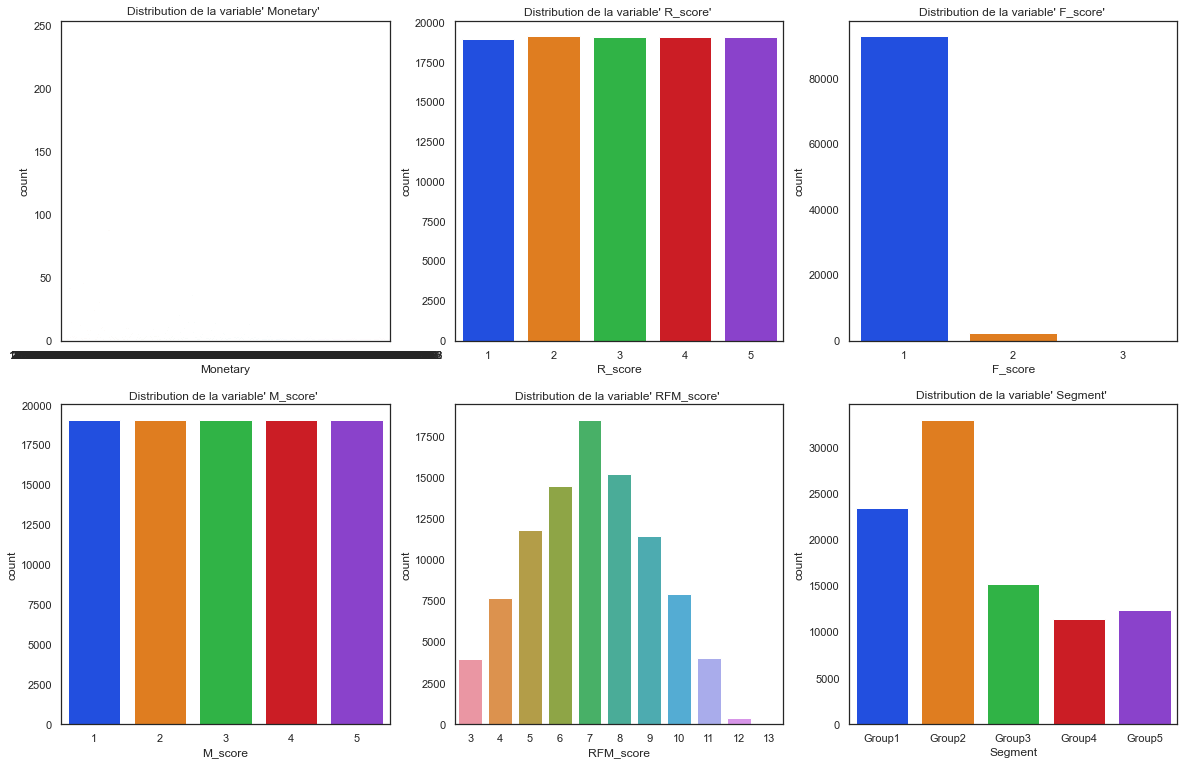

In [6]:
plt.figure(figsize=(20,20))
for i, col in enumerate(rfm.columns[3:].drop('RFM_group')):
    plt.subplot(3,3, i+1)
    sns.countplot(data=rfm, x=col)
    plt.title(f'Distribution de la variable\' {col}\' ')
plt.show()

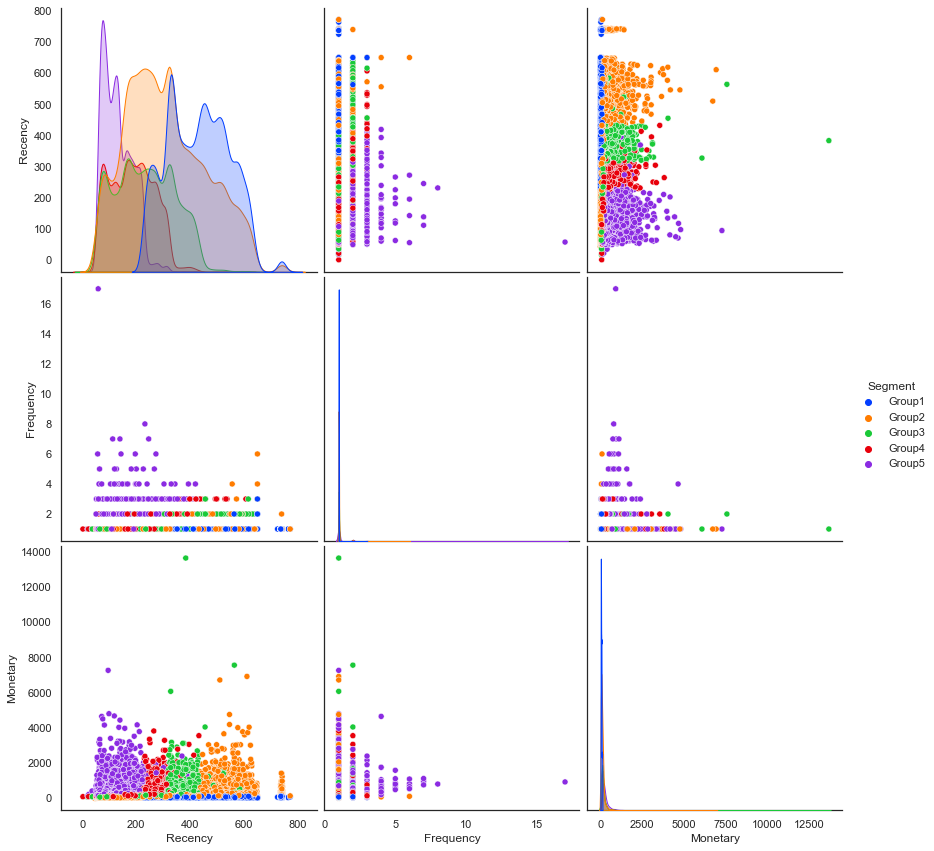

In [7]:
sns.pairplot(rfm, hue='Segment', vars=['Recency', 'Frequency', 'Monetary'], height=4)

<a href="#sommaire" rev="footnote">&#8617;</a>

# 1. KMeans <a class="anchor" id="1"></a>

##  1.1 Application sur les données (Recency, Frequency, Monetary)<a class="anchor" id="1_1"></a>

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#standarisation des données de RFM
std = StandardScaler()
X_std_1 = std.fit_transform(rfm[['Recency','Frequency','Monetary']])

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Elbow_score des modèles<a class="anchor" id="1_1_1"></a>

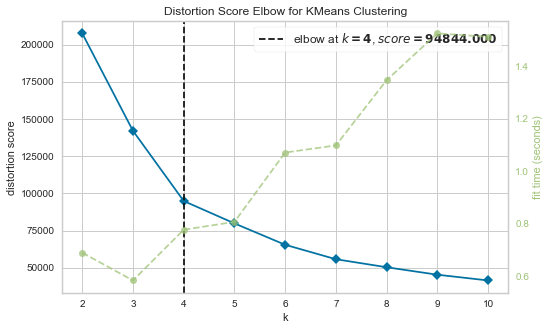

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer

seed = 0
NCLUST = 11

model = KMeans(random_state=seed, init='k-means++')

fig = plt.figure(figsize=(8,5))
visualizer = KElbowVisualizer(model, k=(2,NCLUST), timings=True)
visualizer.fit(X_std_1) 
visualizer.show() 

# fig.savefig('fig1_elbow.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Silhouette_scores des modèles<a class="anchor" id="1_1_2"></a>

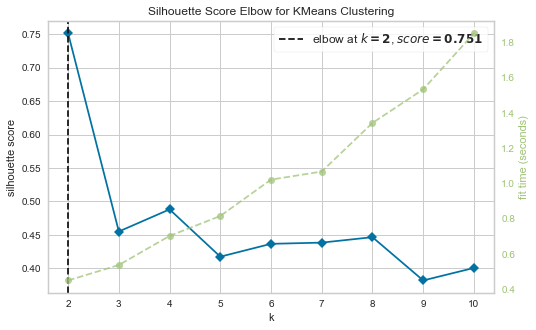

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
fig = plt.figure(figsize=(8,5)) 

visualizer = KElbowVisualizer(model, k=(2,NCLUST), metric='silhouette', timings=True)
visualizer.fit(X_std_1) 
visualizer.show() 

# fig.savefig('fig1_sil.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation de la silhouette_score de chaque cluster <a class="anchor" id="1_1_3"></a>

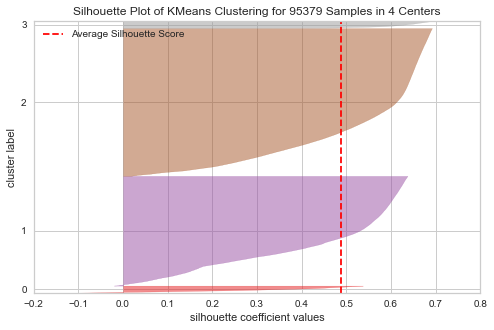

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95379 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_1 = KMeans(random_state=seed, n_clusters=4,init='k-means++')

fig = plt.figure(figsize=(8,5))
visualiser = SilhouetteVisualizer(kmeans_1)
visualiser.fit(X_std_1)
visualiser.show()

# fig.savefig('fig_1_silhouettes.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation du InterclusterDistance <a class="anchor" id="1_1_4"></a>

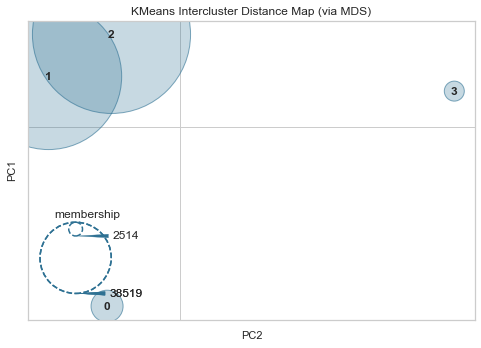

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [12]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(X_std_1)
visualizer.show()  

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="1_1_5"></a>

In [13]:
kmeans_1.fit(X_std_1)
labels_1 = kmeans_1.labels_

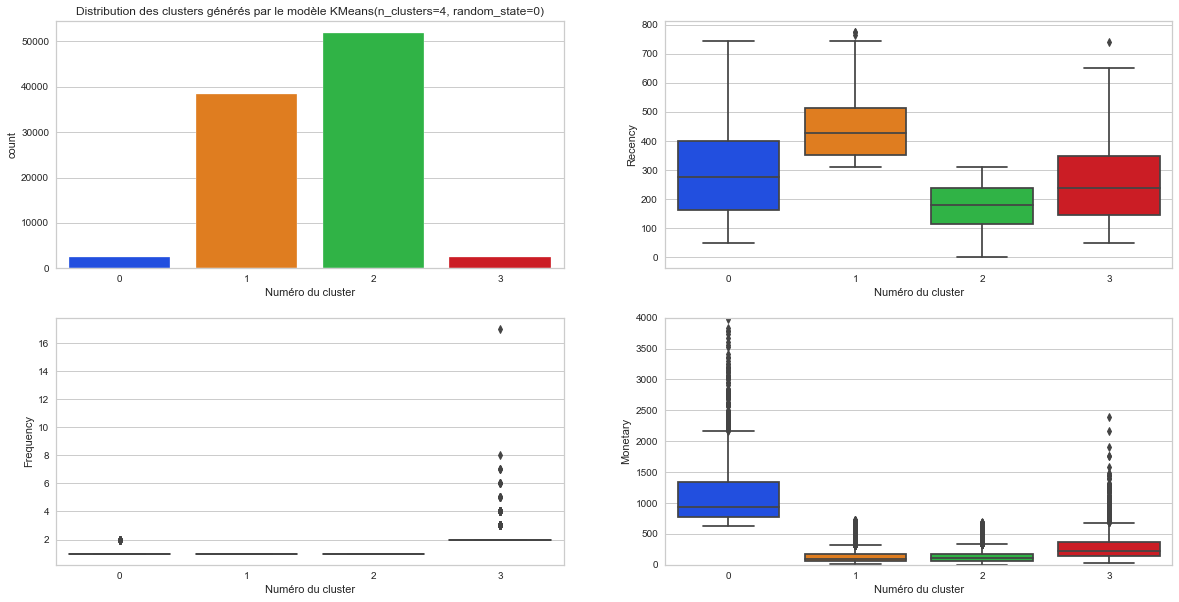

In [14]:
# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,10))

plt.subplot(221)
sns.set_palette(palette)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {kmeans_1}')
sns.countplot(data = rfm, x = labels_1)

plt.subplot(222)
sns.boxplot(data = rfm, y = 'Recency', x = labels_1)
plt.xlabel('Numéro du cluster')

plt.subplot(223)
sns.boxplot(data = rfm, y = 'Frequency', x = labels_1)
plt.xlabel('Numéro du cluster')

plt.subplot(224)
sns.boxplot(data = rfm, y = 'Monetary', x = labels_1)
plt.xlabel('Numéro du cluster')
plt.ylim(0,4000)
plt.show()

# fig.savefig('fig_1.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="1_1_6"></a>

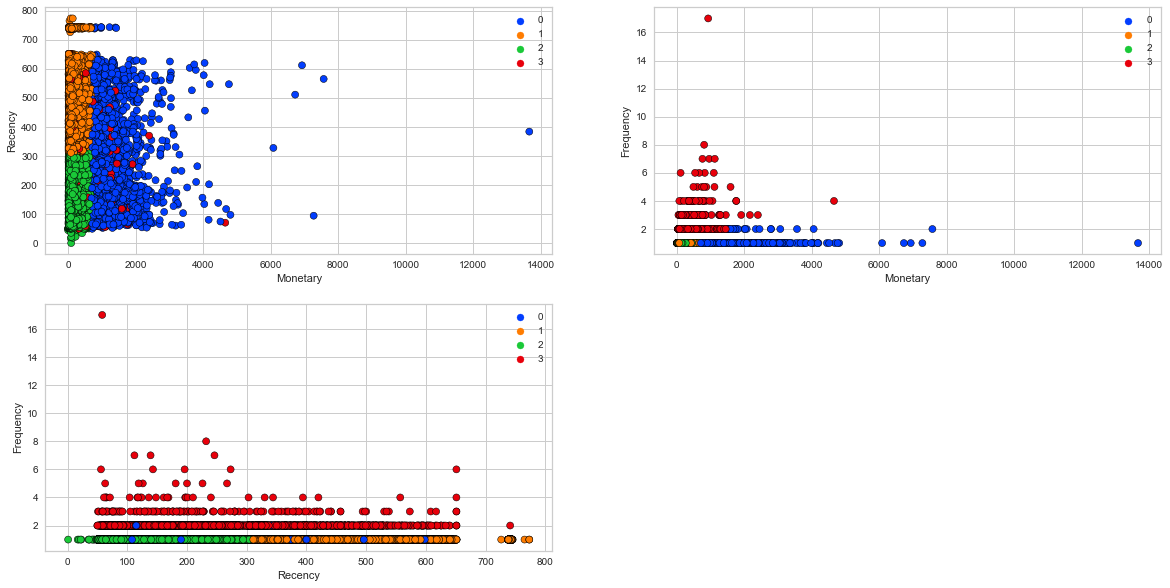

In [15]:
# Visualisations des clusters générés par le kmeans

fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.scatterplot(data=rfm, x='Monetary', y='Recency', hue=labels_1,**kwargs, palette=palette)

plt.subplot(222)
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue=labels_1,**kwargs, palette=palette)

plt.subplot(223)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=labels_1,**kwargs, palette=palette)
plt.show()

# fig.savefig('fig_1_scatter.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 3d <a class="anchor" id="1_1_7"></a>

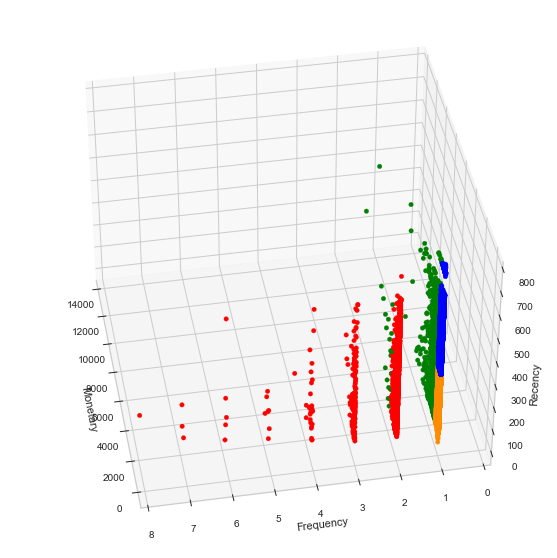

In [16]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c=labels_1, cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=170)
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

In [17]:
data_label_1 = rfm.copy()
data_label_1['label'] = labels_1
data_label_1.groupby('label')[['Recency','Frequency','Monetary']].mean().merge(data_label_1.groupby('label').\
agg(count=('label', 'count')), on='label').reset_index().reset_index()

index  label     Recency  Frequency     Monetary  count
0      0      0  291.418854   1.009547  1162.797168   2514
1      1      1  438.863989   1.000000   133.768206  38519
2      2      2  178.308287   1.000000   134.510514  51864
3      3      3  257.491942   2.113215   295.473662   2482

In [18]:
rfm.describe().loc['mean', ['Recency', 'Frequency', 'Monetary']]

Recency      288.576154
Frequency      1.029220
Monetary     165.502978
Name: mean, dtype: float64

### Caractéristiques des clusters

**Cluster 0** : regroupe 2514 des clients. Ces clients ont dépensé environ 1162 en moyenne (environ 4 fois plus que la
moyenne (288.57)), la majorité d'entre eux ont commandé juste une seule fois et ils ont passé leurs commandes il y a 291 jours en moyenne.

**Cluster 1** : contient 38519 clients et regroupe les clients qui ont ont dépensé en moyenne environ 133 (moins que la moyenne). Ce sont des clients qui ont commanté juste une fois il y a environ 438 jours en moyenne soit une année et deux mois.

**Cluster 2** : ce cluster regroupe 51864 clients. Ces clients ont dépensé environ 134 en moyenne, ils ont commandé une fois mais il y a moins que 6 mois en moyenne.

**Cluster 3** : contient 2482 clients qui ont dépensé environ 295 en moyenne, qui ont commandé plus que 2 fois il y a moins d'un an.

##  1.2 Application sur les données (Recency, Frequency, Monetary, Review_score)<a class="anchor" id="1_2"></a>

In [19]:
rfm = rfm.merge(data.groupby('customer_unique_id').agg(Review_score=('review_score','mean')), on='customer_unique_id').reset_index()
rfm


index                customer_unique_id  Recency  Frequency  Monetary  \
0          0  0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90   
1          1  0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19   
2          2  0000f46a3911fa3c0805444483337064      586          1     86.22   
3          3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62   
4          4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89   
...      ...                               ...      ...        ...       ...   
95374  95374  fffcf5a5ff07b0908bd4e2dbc735a684      496          1   2067.42   
95375  95375  fffea47cd6d3cc0a88bd621562a9d061      311          1     84.58   
95376  95376  ffff371b4d645b6ecea244b27531430a      618          1    112.46   
95377  95377  ffff5962728ec6157033ef9805bacc48      169          1    133.69   
95378  95378  ffffd2657e2aad2907e67c3e9daecbeb      533          1     71.56   

       R_score  F_score  M_score RFM_group  RFM_score Segment  Review_score  
0            4        1        4       414          9  Group4           5.0  
1            4        1        1       411          6  Group2           4.0  
2            1        1        2       112          4  Group1           3.0  
3            2        1        1       211          4  Group1           4.0  
4            2        1        4       214          7  Group2           5.0  
...        ...      ...      ...       ...        ...     ...           ...  
95374        1        1        5       115          7  Group2           5.0  
95375        3        1        2       312          6  Group2           4.0  
95376        1        1        3       113          5  Group1           5.0  
95377        4        1        4       414          9  Group4           5.0  
95378        1        1        2       112          4  Group1           5.0  

[95379 rows x 12 columns]

<a href="#sommaire" rev="footnote">&#8617;</a>

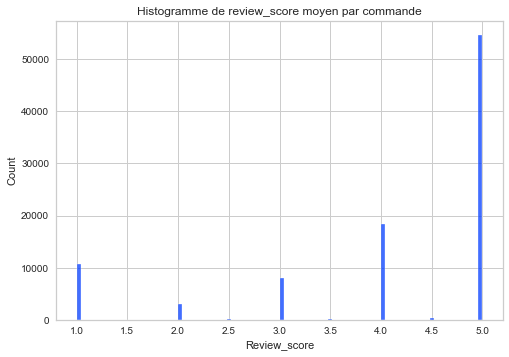

In [20]:
sns.histplot(data = rfm, x='Review_score')
plt.title('Histogramme de review_score moyen par commande')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

In [21]:
#standarisation des données de RFM 'Recency','Frequency','Monetary', 'Review_score'
std = StandardScaler()
X_std_2 = std.fit_transform(rfm[['Recency','Frequency','Monetary', 'Review_score']])

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Elbow_score des modèles<a class="anchor" id="1_2_1"></a>

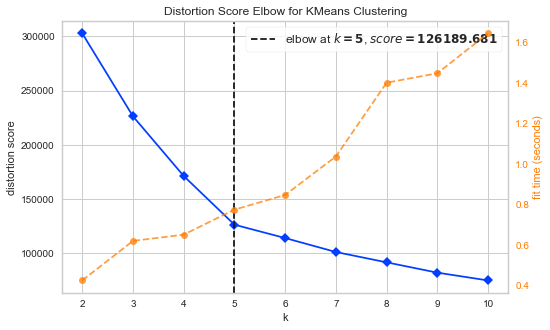

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans(random_state = seed, init = 'k-means++')

fig = plt.figure(figsize=(8,5))

visualizer = KElbowVisualizer(model, k = (2,NCLUST), timings = True)
visualizer.fit(X_std_2)
visualizer.show()

# fig.savefig('fig_2_elbow.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Silhouette_scores des modèles<a class="anchor" id="1_2_2"></a>

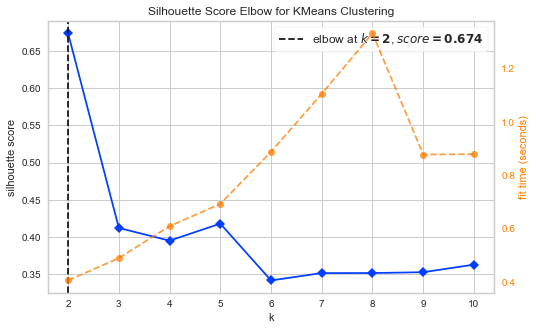

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
fig = plt.figure(figsize=(8,5))
visualizer = KElbowVisualizer(model, k=(2,NCLUST), metric='silhouette', timings=True)
visualizer.fit(X_std_2) 
visualizer.show()

# fig.savefig('fig_2_sil.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation de la silhouette_score de chaque cluster <a class="anchor" id="1_2_3"></a>

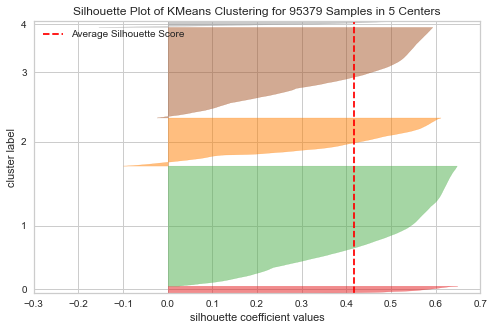

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95379 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
kmeans_2 = KMeans(random_state = seed, n_clusters = 5, init = 'k-means++')

fig = plt.figure(figsize=(8,5))
visualiser = SilhouetteVisualizer(kmeans_2)
visualiser.fit(X_std_2)
visualiser.show()

# fig.savefig('fig_2_silhouettes.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation du InterclusterDistance <a class="anchor" id="1_2_4"></a>

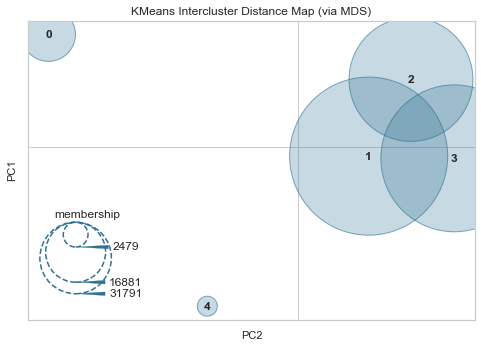

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
visualizer = InterclusterDistance(kmeans_2)
visualizer.fit(X_std_2)  
visualizer.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="1_2_5"></a>

In [26]:
kmeans_2.fit(X_std_2)
labels_2 = kmeans_2.labels_

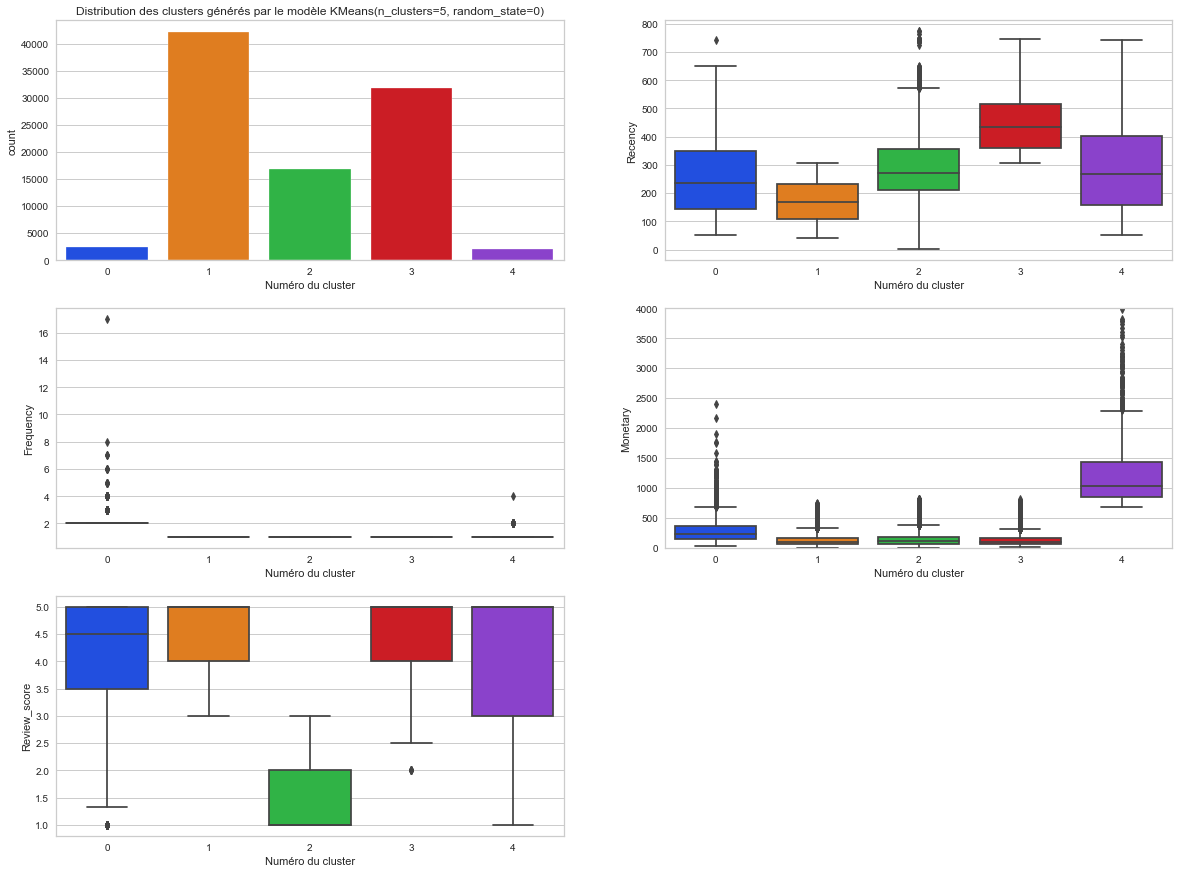

In [27]:
# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,15))

plt.subplot(321)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {kmeans_2}')
sns.countplot(data = rfm, x = labels_2)

plt.subplot(322)
sns.boxplot(data = rfm, y = 'Recency', x = labels_2)
plt.xlabel('Numéro du cluster')

plt.subplot(323)
sns.boxplot(data = rfm, y = 'Frequency', x = labels_2)
plt.xlabel('Numéro du cluster')

plt.subplot(324)
sns.boxplot(data = rfm, y = 'Monetary', x = labels_2)
plt.xlabel('Numéro du cluster')
plt.ylim(0,4000)

plt.subplot(325)
sns.boxplot(data = rfm, y = 'Review_score', x = labels_2)
plt.xlabel('Numéro du cluster')
plt.show()

# fig.savefig('fig_2.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="1_2_6"></a>

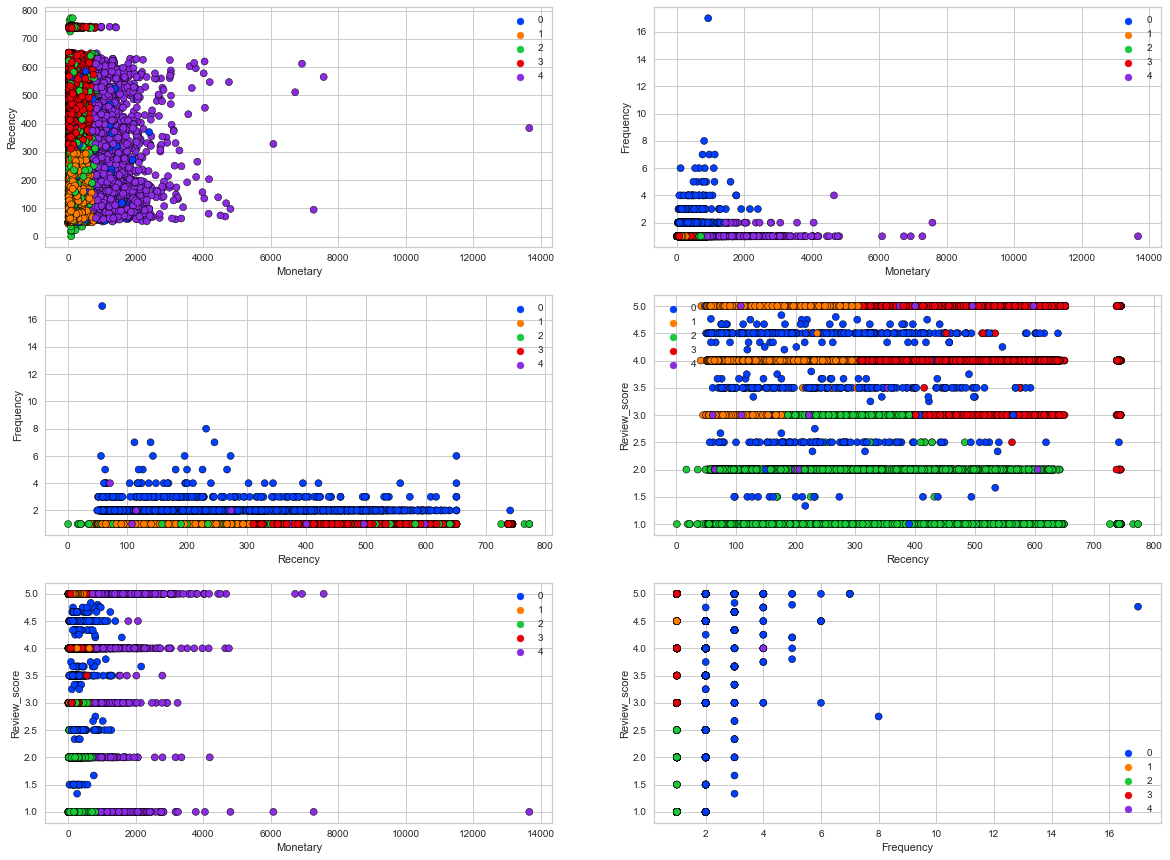

In [28]:
# Visualisations des clusters générés par le kmeans

fig = plt.figure(figsize=(20,15))

plt.subplot(321)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Recency', hue = labels_2, **kwargs, palette = palette)

plt.subplot(322)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Frequency', hue = labels_2, **kwargs, palette = palette)

plt.subplot(323)
sns.scatterplot(data = rfm, x = 'Recency', y = 'Frequency', hue = labels_2, **kwargs, palette = palette)

plt.subplot(324)
sns.scatterplot(data = rfm, x = 'Recency', y = 'Review_score', hue = labels_2, **kwargs, palette = palette)

plt.subplot(325)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Review_score', hue = labels_2, **kwargs, palette = palette)

plt.subplot(326)
sns.scatterplot(data = rfm, x = 'Frequency', y = 'Review_score', hue = labels_2, **kwargs, palette = palette)
plt.show()

# fig.savefig('fig_2_scatter.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 3d <a class="anchor" id="1_2_7"></a>

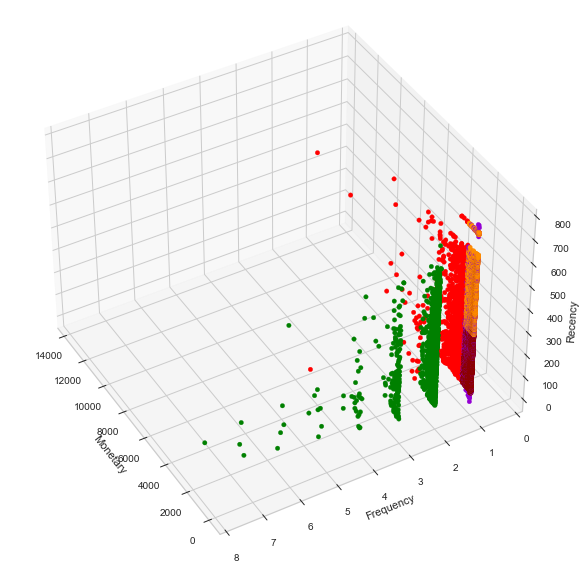

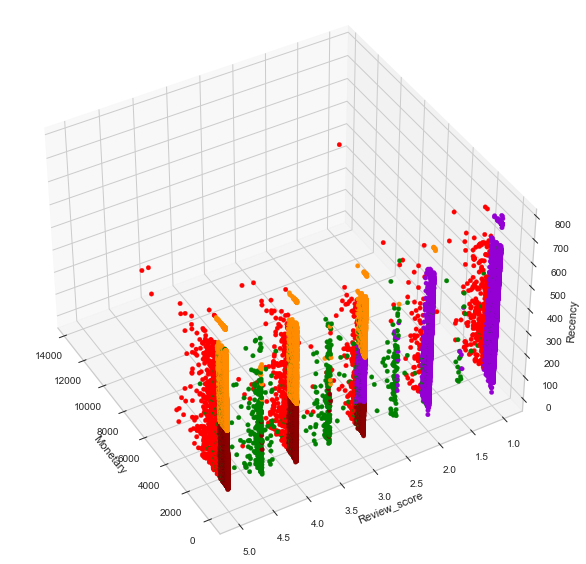

In [29]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c=labels_2, cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=150)
plt.show()

plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter3D(rfm.Monetary, rfm.Review_score, rfm.Recency, c=labels_2, cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Review_score')
ax.set_zlabel('Recency')
ax.view_init(elev=40, azim=150)
plt.show()

In [30]:
data_label_2 = rfm.copy()
data_label_2['label'] = labels_2
data_label_2.groupby('label')[['Recency','Frequency','Monetary','Review_score']].mean().\
merge(data_label_2.groupby('label').agg(count = ('label', 'count')), on = 'label').reset_index()

label     Recency  Frequency     Monetary  Review_score  count
0      0  257.611134   2.112545   292.773094      4.202877   2479
1      1  172.054687   1.000000   133.099883      4.669943  42167
2      2  292.957585   1.000000   152.343387      1.593182  16881
3      3  443.285867   1.000000   134.167239      4.631389  31791
4      4  287.500728   1.014071  1266.512319      3.960699   2061

### Caractéristiques des clusters

**Cluster 0** : regroupe 2 479 clients. Ces clients ont dépensé environ 292 en moyenne (légèrement plus que la moyenne), ils ont commandé plus qu'une fois il y a moins qu'un an (environ 257 jours) en moyenne et qui ont mis une bonne note à leurs commandes (note de 4.20 en moyenne).

**Cluster 1** : contient 42 167 clients et regroupe les clients qui ont ont dépensé en moyenne environ 133 (moins que la moyenne). Ce sont des clients qui ont commandé juste une fois il y a environ 172 jours en moyenne soit environ 6 mois et qui ont mis une bonne note à leurs commandes (note de 4.67 en moyenne).

**Cluster 2** : ce cluster regroupe 16 881 clients. Ces clients ont dépensé environ 152 en moyenne, ils ont commandé une fois mais il y a moins qu'un an en moyenne (environ 292 jours) et ils ont une mauvaise note à leurs commandes (environ 1.59 en moyenne).

**Cluster 3** : contient 31 791 clients qui ont dépensé environ 134 en moyenne, qui ont commandé il y a plus qu'un an, ils ont acheté une fois et ils ont mis une bonne note à leurs commandes. 

**Cluster 4** : contient 2 061 clients qui ont dépensé environ 1 266 en moyenne, que la mojorité entre eux ont commandé une fois, ils ont acheté il y a moins d'un an et ils ont mis une note de 3.9 en moyenne.

<a href="#sommaire" rev="footnote">&#8617;</a>

##  1.3 Application sur les données (Recency, Frequency, Monetary, Review_score,N_products)<a class="anchor" id="1_3"></a>

In [31]:
rfm = rfm.merge(data.groupby('customer_unique_id').agg(\
N_products=('n_produits','sum')), on = 'customer_unique_id')
rfm.head()

index                customer_unique_id  Recency  Frequency  Monetary  \
0      0  0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90   
1      1  0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19   
2      2  0000f46a3911fa3c0805444483337064      586          1     86.22   
3      3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62   
4      4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89   

   R_score  F_score  M_score RFM_group  RFM_score Segment  Review_score  \
0        4        1        4       414          9  Group4           5.0   
1        4        1        1       411          6  Group2           4.0   
2        1        1        2       112          4  Group1           3.0   
3        2        1        1       211          4  Group1           4.0   
4        2        1        4       214          7  Group2           5.0   

   N_products  
0           1  
1           1  
2           1  
3           1  
4           1

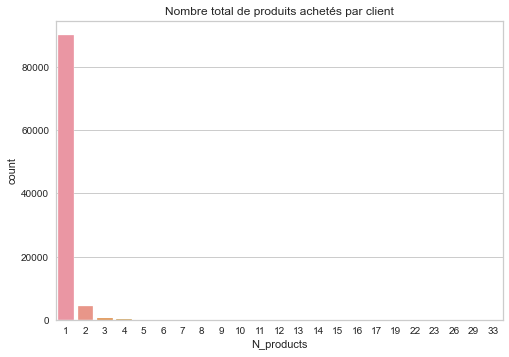

In [32]:
sns.countplot(data = rfm, x = 'N_products')
plt.title('Nombre total de produits achetés par client')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

In [33]:
#standarisation des données de RFM
std = StandardScaler()
X_std_3 = std.fit_transform(rfm[['Recency','Frequency','Monetary', 'Review_score','N_products']])

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Elbow_score des modèles<a class="anchor" id="1_3_1"></a>

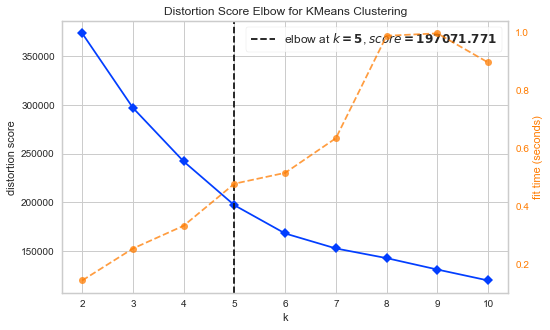

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state = seed, init = 'k-means++')

fig = plt.figure(figsize=(8,5))
visualizer = KElbowVisualizer(model, k = (2,NCLUST), timings = True)
visualizer.fit(X_std_3)
visualizer.show()

# fig.savefig('fig_3_elbow.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Silhouette_scores des modèles<a class="anchor" id="1_3_2"></a>

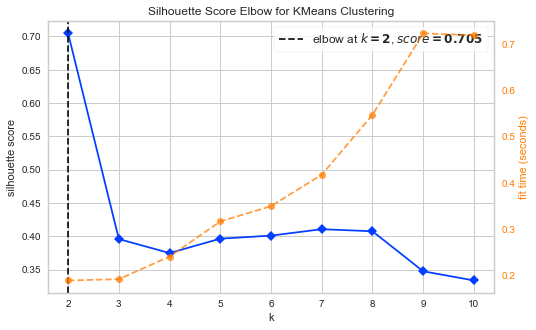

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
fig = plt.figure(figsize=(8,5))

visualizer = KElbowVisualizer(model, k=(2,NCLUST) , metric='silhouette' , timings=True)
visualizer.fit(X_std_3)
visualizer.show()  

# fig.savefig('fig_3_sil.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation de la silhouette_score de chaque cluster <a class="anchor" id="1_3_3"></a>

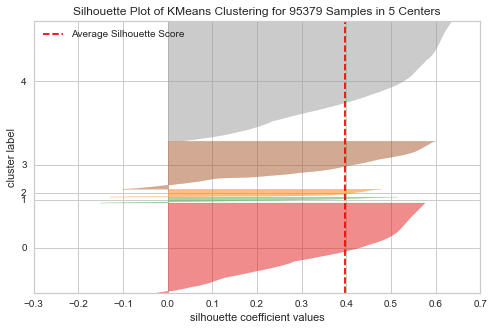

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95379 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
fig = plt.figure(figsize=(8,5))

kmeans_3 = KMeans(random_state = seed , n_clusters = 5 , init = 'k-means++')
visualiser = SilhouetteVisualizer(kmeans_3)
visualiser.fit(X_std_3)
visualiser.show()

# fig.savefig('fig_3_silhouettes.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation du InterclusterDistance <a class="anchor" id="1_3_4"></a>

C:\Users\modes\anaconda3\envs\OpenClassrooms_projet5\lib\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


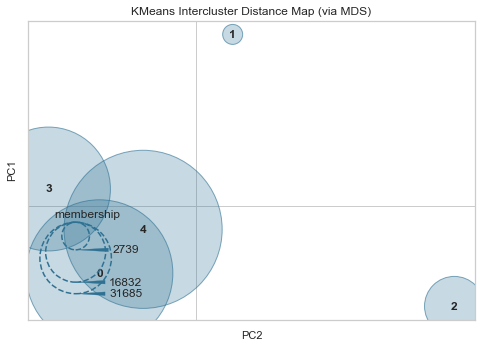

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [37]:
visualizer = InterclusterDistance(kmeans_3)
visualizer.fit(X_std_3) 
visualizer.show()  

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="1_3_5"></a>

In [38]:
kmeans_3.fit(X_std_3)
labels_3 = kmeans_3.labels_

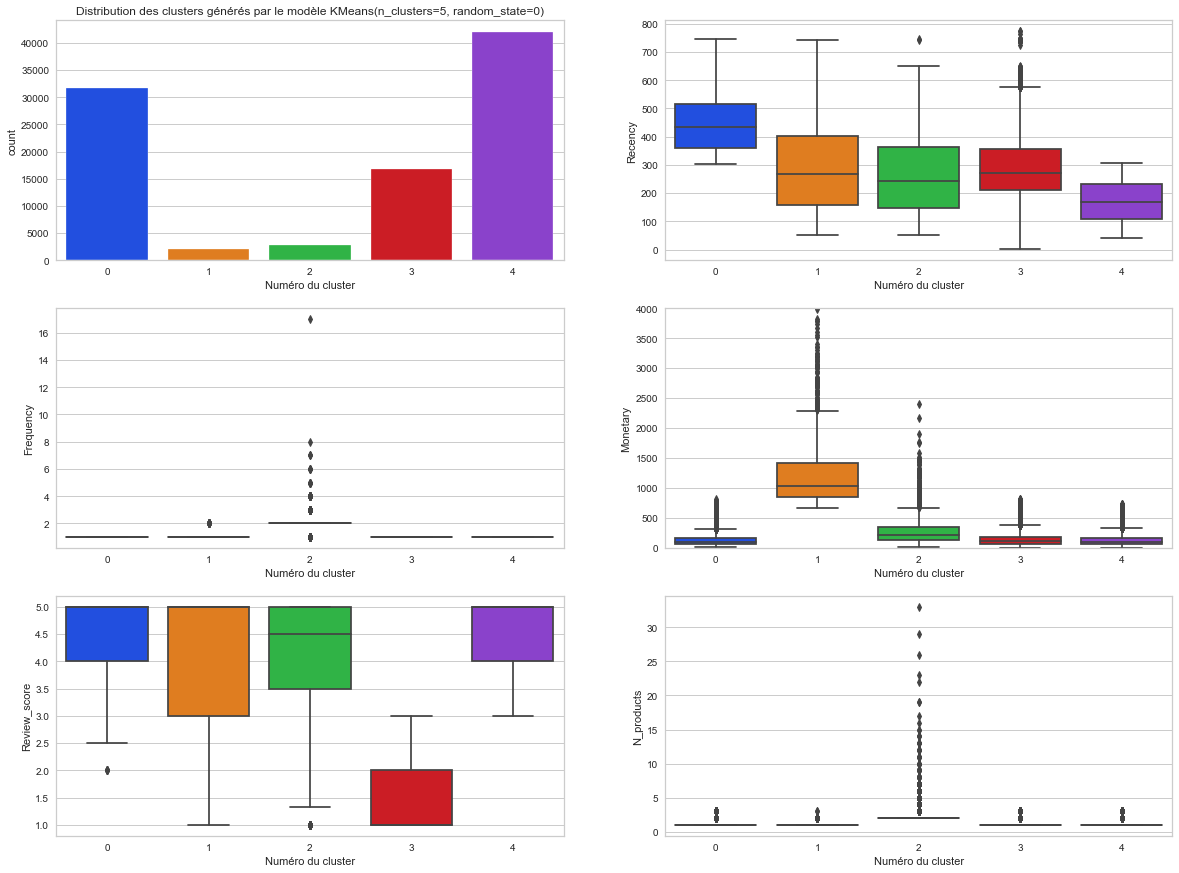

In [39]:
# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,15))

plt.subplot(321)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {kmeans_3}')
sns.countplot(data = rfm, x = labels_3)

plt.subplot(322)
sns.boxplot(data = rfm, y = 'Recency', x = labels_3)
plt.xlabel('Numéro du cluster')

plt.subplot(323)
sns.boxplot(data = rfm, y = 'Frequency', x = labels_3)
plt.xlabel('Numéro du cluster')

plt.subplot(324)
sns.boxplot(data = rfm, y = 'Monetary', x = labels_3)
plt.xlabel('Numéro du cluster')
plt.ylim(0,4000)

plt.subplot(325)
sns.boxplot(data = rfm, y = 'Review_score', x = labels_3)
plt.xlabel('Numéro du cluster')

plt.subplot(326)
sns.boxplot(data = rfm, y = 'N_products', x = labels_3)
plt.xlabel('Numéro du cluster')
plt.show()

# fig.savefig('fig_3.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="1_3_6"></a>

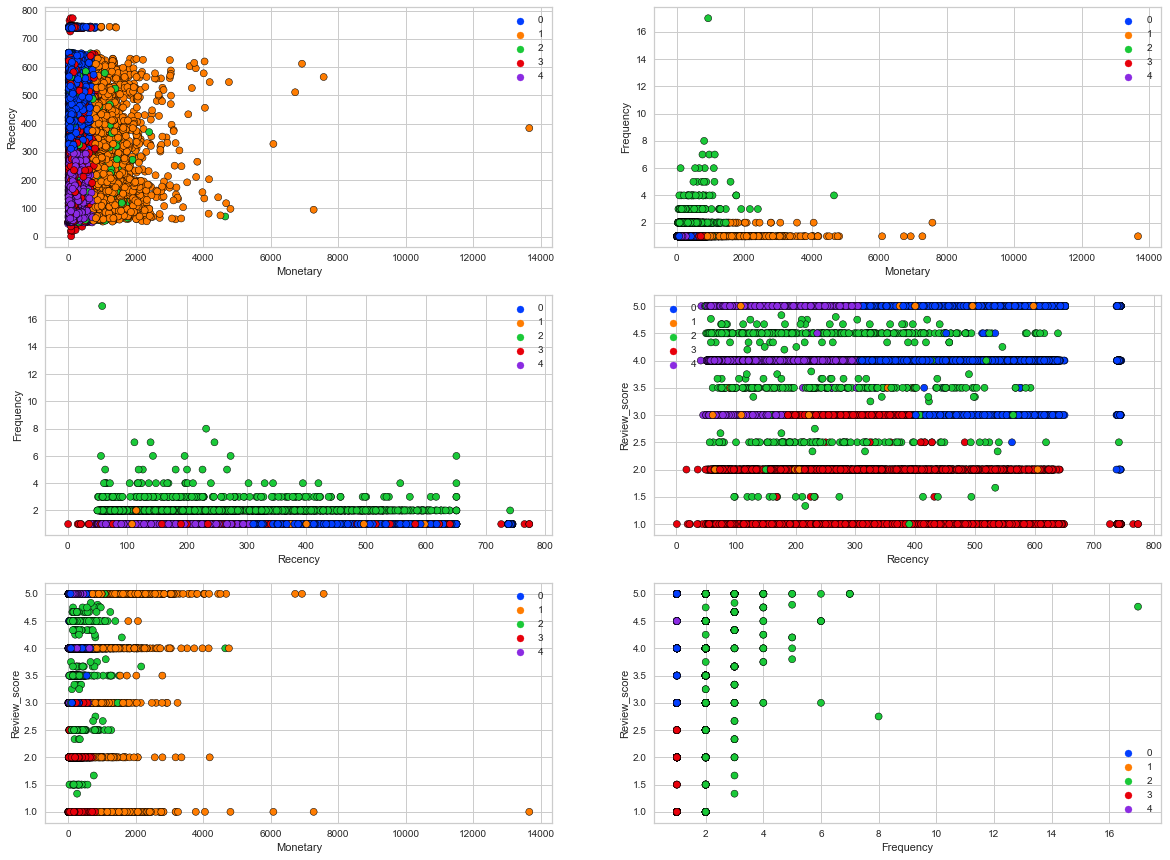

In [40]:
# Visualisations des clusters générés par le kmeans

fig = plt.figure(figsize = (20,15))

plt.subplot(321)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Recency', hue = labels_3, **kwargs, palette = palette)

plt.subplot(322)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Frequency', hue = labels_3, **kwargs, palette = palette)

plt.subplot(323)
sns.scatterplot(data = rfm, x = 'Recency', y = 'Frequency', hue = labels_3, **kwargs, palette = palette)

plt.subplot(324)
sns.scatterplot(data = rfm, x = 'Recency', y = 'Review_score', hue = labels_3, **kwargs, palette = palette)

plt.subplot(325)
sns.scatterplot(data = rfm, x = 'Monetary', y = 'Review_score', hue = labels_3, **kwargs, palette = palette)

plt.subplot(326)
sns.scatterplot(data = rfm, x = 'Frequency', y = 'Review_score', hue = labels_3, **kwargs, palette = palette)
plt.show()

# fig.savefig('fig_3_scatter.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 3d <a class="anchor" id="1_3_7"></a>

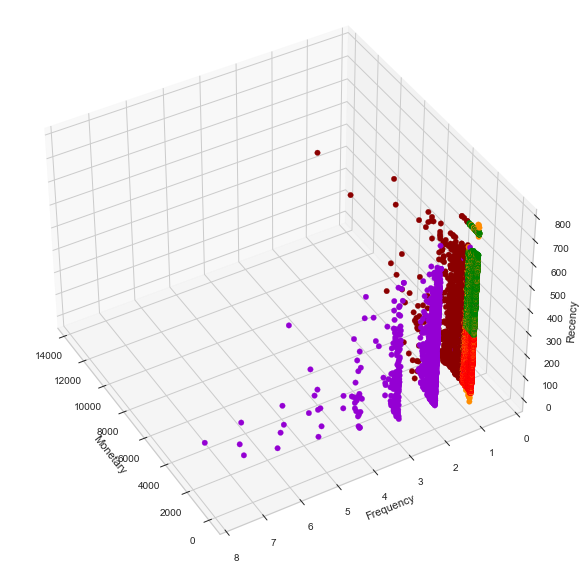

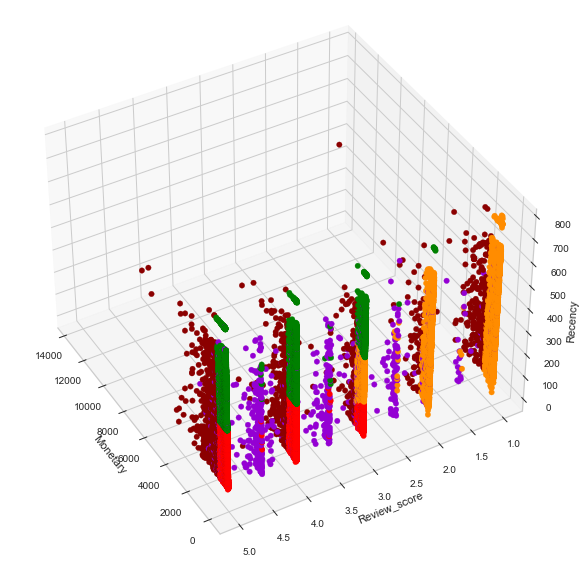

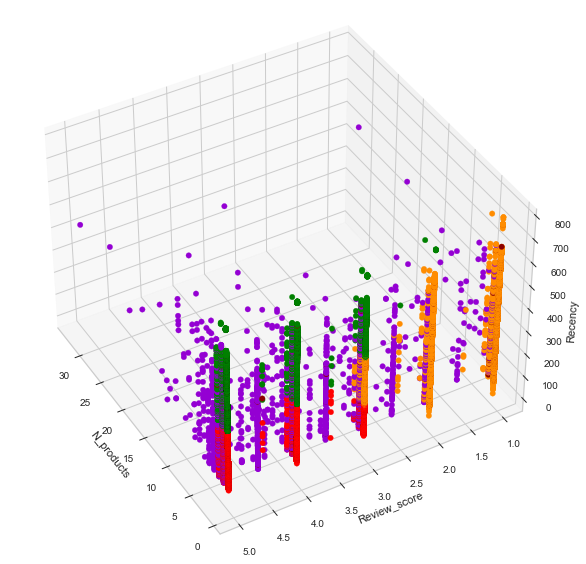

In [41]:
plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c = labels_3, cmap = cmap,s = 30, alpha = 1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev = 40, azim = 150)
plt.show()

plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.scatter3D(rfm.Monetary, rfm.Review_score, rfm.Recency, c = labels_3, cmap = cmap,s = 30, alpha = 1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Review_score')
ax.set_zlabel('Recency')
ax.view_init(elev = 40, azim = 150)
plt.show()

plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
ax.scatter3D(rfm.N_products, rfm.Review_score, rfm.Recency, c = labels_3, cmap = cmap,s = 30, alpha = 1)
ax.set_xlabel('N_products')
ax.set_ylabel('Review_score')
ax.set_zlabel('Recency')
ax.view_init(elev = 40, azim = 150)
plt.show()

In [42]:
data_label_3 = rfm.copy()
data_label_3['label'] = labels_3
data_label_3.groupby('label')[['Recency','Frequency','Monetary','Review_score','N_products']].\
mean().merge(data_label_3.groupby('label').agg(count = ('label', 'count')), on = 'label').reset_index()

label     Recency  Frequency     Monetary  Review_score  N_products  count
0      0  443.217264   1.000000   133.968774      4.631150    1.033107  31685
1      1  287.388382   1.010082  1255.961253      3.966155    1.048968   2083
2      2  263.718876   2.009858   283.002380      4.192381    2.614458   2739
3      3  292.802757   1.000000   152.300462      1.593245    1.031666  16832
4      4  172.011275   1.000000   132.870499      4.670088    1.025571  42040

### Caractéristiques des clusters

**Cluster 0** : ce cluster regroupe 31 685 clients. il constitue les clients les plus anciens : les clients qui ont passé leurs commandes il y a un an et deux mois en moyenne, qui ont commandé une fois, qui ont dépensé environ 133 (moins que la moyenne), que la majotité entre eux ont acheté un seul produit mais qui ont été satisfait globalement.

**Cluster 1** : contient 2 083 clients et regroupe les clients qui ont ont dépensé en moyenne 1255 (4 fois plus que la moyenne). Ils ont commandé globalement une seule fois, ils ont effectué leurs commandes en moyenne il y a 287 jours soit 9 mois et 14 jours. La majorité entre eux ont attribué une note entre 3 et 5 et ils ont ont commandé une seule fois.

**Cluster 2** : ce cluster regroupe 2 739 clients. Ces clients ont dépensé en moyenne 283 (environ la moyenne des dépenses de tous les clients). Ils ont effectué leurs commandes en moyenne il y a 263 jours soit 8 mois et 20 jours. ILs ont commandé 2 fois sauf quelques clients. Globalement, ils ont mis une note entre 3.5 et 5 et ils ont commandé plus que deux produits en moyenne.

**Cluster 3** : ce cluster se compose de 16 832 clients et contient les clients les moins satisfaits de leurs commandes (leurs notes ne dépassent pas 2.5), ils ont dépensé moins que la moyenne (environ 152), ils ont commandé seulement une fois, la plupart entre eux ont commandé un seul produit et leurs commandes a été effectué globalement il y a moins qu'un an.

**Cluster 4** : ce cluster contient un nombre de clients plus élevé que les autres clusters soit 42 040, il se compose des nouveaux clients (récence moyenne est de 5 mois et 21 jours). Ces clients ont commandé une seule fois, ils ont dépensé environ 132 (moins que la moyenne), la mojorité a commandé un seul produit mais ils sont des clients satisfaits de leurs commandes globalement (note entre 4 et 5).

<a href="#sommaire" rev="footnote">&#8617;</a>

## Application sur les données (log(Recency), log(Frequency), log(Monetary))] <a class="anchor" id="1_4"></a>

In [43]:
#standarisation des données 
std = StandardScaler()
X_std_4 = std.fit_transform(rfm_log[['Recency','Frequency','Monetary']])

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Elbow_score des modèles<a class="anchor" id="1_4_1"></a>

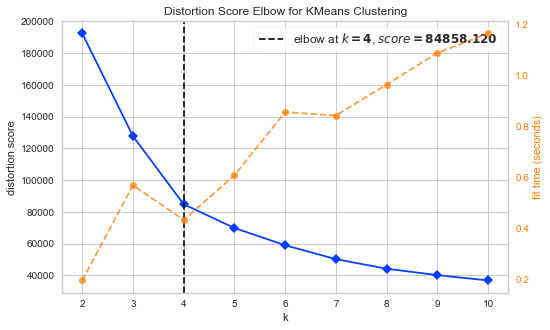

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
fig = plt.figure(figsize=(8,5))

visualizer = KElbowVisualizer(model, k=(2,NCLUST) , timings=True)
visualizer.fit(X_std_4)
visualizer.show()  

# fig.savefig('fig_4_elbow.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des Silhouette_scores des modèles<a class="anchor" id="1_4_2"></a>

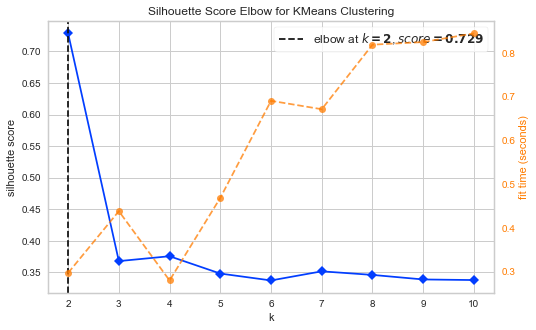

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
fig = plt.figure(figsize=(8,5))

visualizer = KElbowVisualizer(model , k=(2,NCLUST) , metric='silhouette' , timings=True)
visualizer.fit(X_std_4) 
visualizer.show()

# fig.savefig('fig_4_sil.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation de la silhouette_score de chaque cluster <a class="anchor" id="1_4_3"></a>

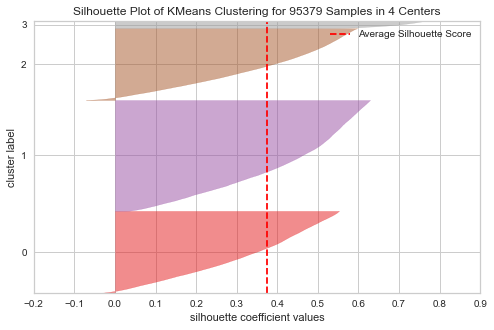

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95379 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
fig = plt.figure(figsize=(8,5))

kmeans_4 = KMeans(random_state = seed , n_clusters = 4 , init = 'k-means++')
visualiser = SilhouetteVisualizer(kmeans_4)
visualiser.fit(X_std_4)
visualiser.show()

# fig.savefig('fig_4_silhouettes.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation du InterclusterDistance <a class="anchor" id="1_4_4"></a>

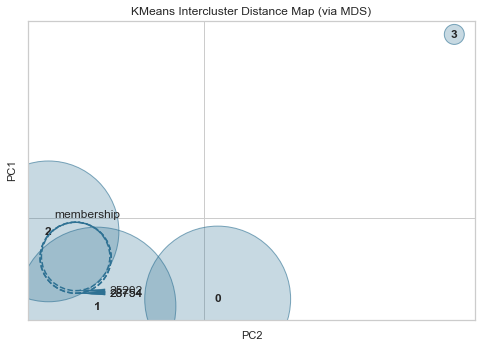

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [47]:
visualizer = InterclusterDistance(kmeans_4)
visualizer.fit(X_std_4)
visualizer.show()  

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="1_4_5"></a>

In [48]:
kmeans_4.fit(X_std_4)
labels_4 = kmeans_4.labels_

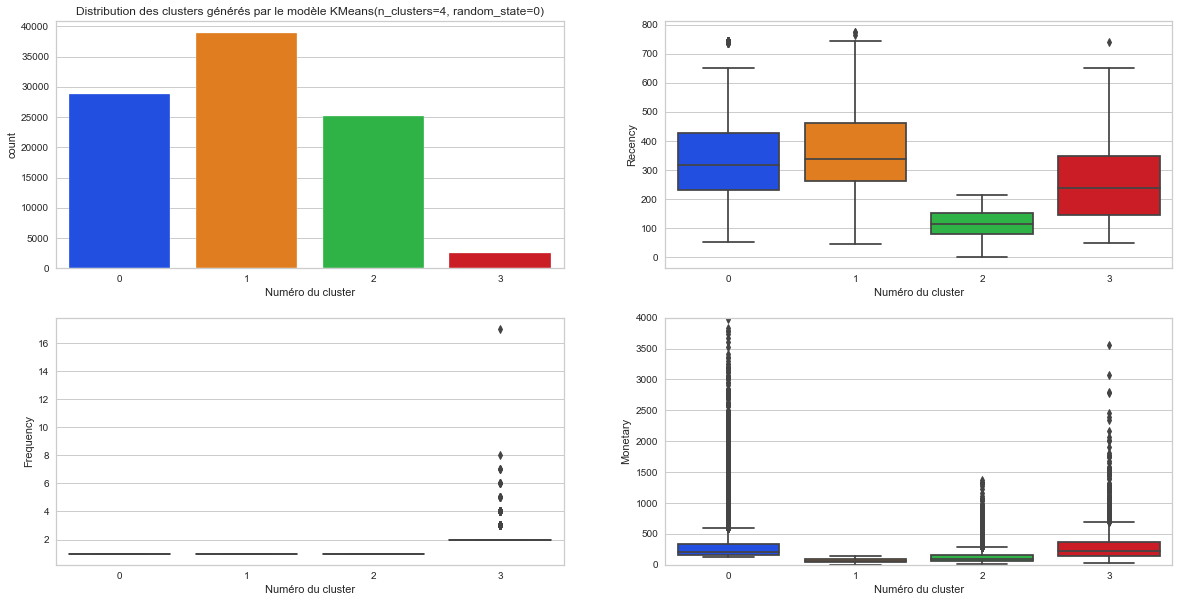

In [49]:
# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,10))

plt.subplot(221)
sns.set_palette(palette)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {kmeans_4}')
sns.countplot(data = rfm, x = labels_4)

plt.subplot(222)
sns.boxplot(data = rfm, y = 'Recency', x = labels_4)
plt.xlabel('Numéro du cluster')

plt.subplot(223)
sns.boxplot(data = rfm, y = 'Frequency', x = labels_4)
plt.xlabel('Numéro du cluster')

plt.subplot(224)
sns.boxplot(data = rfm, y = 'Monetary', x = labels_4)
plt.xlabel('Numéro du cluster')
plt.ylim(0,4000)
plt.show()

# fig.savefig('fig_4.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="1_4_6"></a>

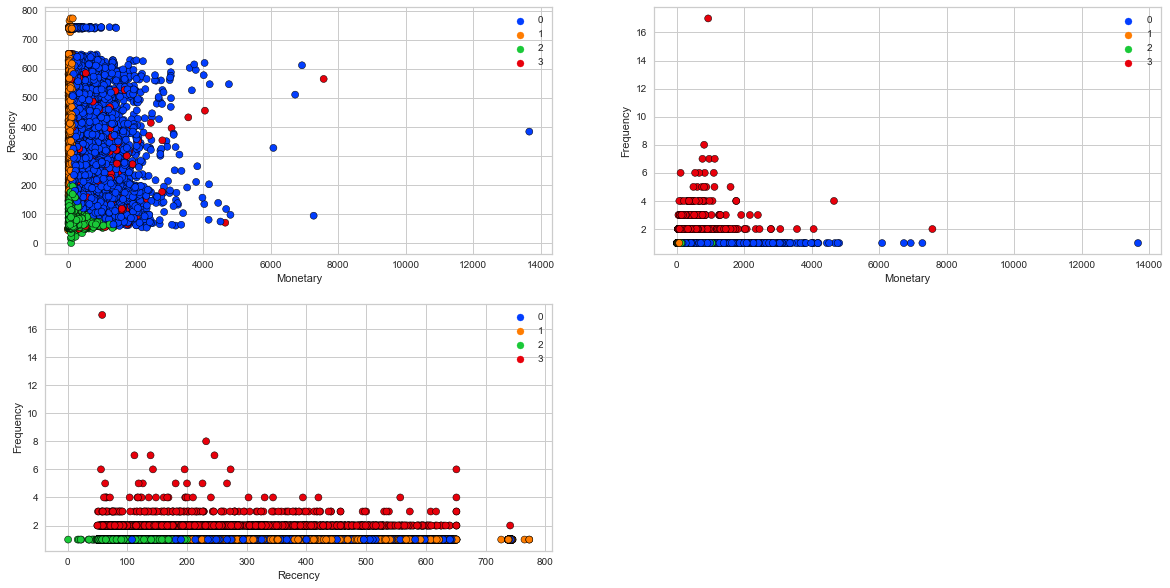

In [50]:
# Visualisations des clusters générés par le kmeans

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
sns.scatterplot(data=rfm, x='Monetary', y='Recency', hue=labels_4,**kwargs, palette=palette)

plt.subplot(222)
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue=labels_4,**kwargs, palette=palette)

plt.subplot(223)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=labels_4,**kwargs, palette=palette)
plt.show()

# fig.savefig('fig_4_scatter.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 3d <a class="anchor" id="1_4_7"></a>

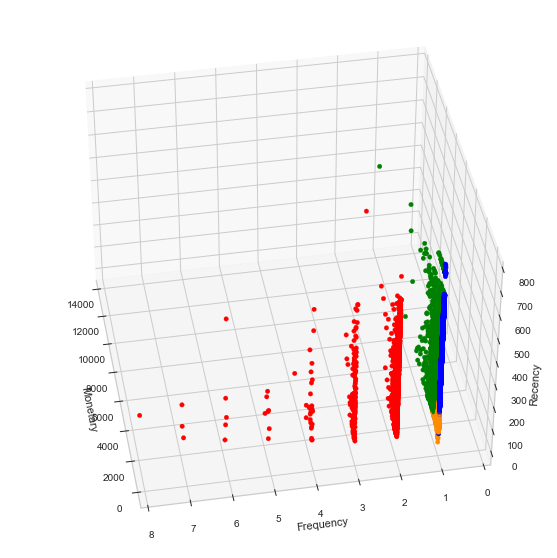

In [51]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c=labels_4, cmap=cmap, s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=170)
plt.show()

In [52]:
data_label_4 = rfm.copy()[['Recency', 'Frequency', 'Monetary']]
data_label_4['label'] = labels_4
data_label_4.groupby('label').mean().merge(
    data_label_4.groupby('label').agg(count=('label', 'count')), 
    on='label'
).reset_index().reset_index()

index  label     Recency  Frequency    Monetary  count
0      0      0  336.472699   1.000000  319.743191  28754
1      1      1  366.845749   1.000000   69.255402  38917
2      2      2  116.129553   1.000000  123.294152  25202
3      3      3  257.755786   2.112131  314.900686   2506

### Caractéristiques des clusters

Ce modèle a donné 4 clusters qui sont généralement équilibrés:

**Cluster 0** : ce cluster regroupe 28 754 clients. Il regroupe les clients qui dépensent le plus (La moyenne de leurs dépenses est 319) mais ils ont commandé une seule fois il y a longtemps (récence moyenne 336 jours soit 11 mois et 2 jours)

**Cluster 1** : contient 38 917 clients et regroupe les clients qui ont ont dépensé très peu (69 soit environ la moyenne divisé sur 4), qui ont commandé une seule fois il y a longtemps (récence moyenne 366 soit une année et un jour).

**Cluster 2** : ce cluster regroupe 25 202 clients. Ces clients ont dépensé peu :  123 (moins que la moitié de la moyenne), ils ont commandé une seule fois mais assez récemment (récence moyenne est 116 jours soit 3 mois et 26 jours)

**Cluster 3** : ce cluster se compose de moins de clients que les autres clusters (2 506 clients), ces clients ont dépensé plus que la moyenne (314), ils ont commandé plus que 2 fois et ils ont commangé il y a moins qu'un an (une récence moyenne d'environ 257 jours soit 8 mois et 14 jours).

# 2. DBSCAN <a class="anchor" id="2"></a>

##  2.1 Application sur les données (Recency, Frequency, Monetary)<a class="anchor" id="2_1"></a>

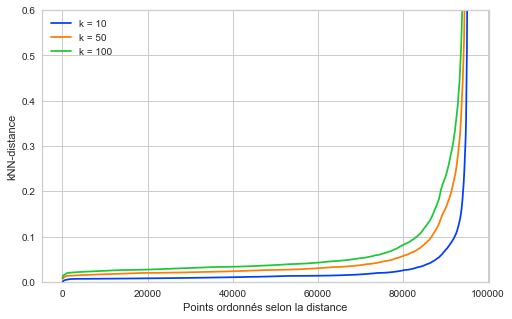

In [53]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 101)
neigh.fit(X_std_1)
distances, indices = neigh.kneighbors(X_std_1)
distances = np.sort(distances, axis = 0)
k1 = 10
k2 = 50
k3 = 100
distk1 = distances[:,k1]
distk2 = distances[:,k2]
distk3 = distances[:,k3]

fig = plt.figure(figsize = (8,5))
plt.plot(distk1, label = 'k = ' + str(k1))
plt.plot(distk2, label = 'k = ' + str(k2))
plt.plot(distk3, label = 'k = ' + str(k3))
plt.ylim(0,.6)
plt.legend()
plt.xlabel('Points ordonnés selon la distance')
plt.ylabel('kNN-distance')
plt.show()

# fig.savefig('dbscan_dis.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

In [54]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.04)
db.fit(X_std_1)
len(set(db.labels_)) - (1 if -1 in db.labels_ else 0), sum(db.labels_==-1)

(233, 4449)

In [55]:
from itertools import product
from tqdm import tqdm

noises = []
n_clusters = []
t_fit = []
eps_values = [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]
min_samples = [10,20,50,80,90,100]
DBSCAN_params = list(product(eps_values, min_samples))

for params in tqdm(DBSCAN_params, total = len(DBSCAN_params)):
    t0 = time()
    db = DBSCAN(eps=params[0], min_samples=params[1]).fit(X_std_1)
    t_fit.append(time()-t0)
    n_clusters.append(len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
    noises.append(sum(db.labels_==-1))    

100%|██████████| 54/54 [04:17<00:00,  4.77s/it]


In [56]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['epsilon', 'min_samples'])   
tmp['n_clusters'] = n_clusters
tmp['outliers'] = noises
tmp['t_fit'] = t_fit
pivot_1 = pd.pivot_table(tmp, values='n_clusters', index='min_samples', columns='epsilon')
pivot_2 = pd.pivot_table(tmp, values='outliers', index='min_samples', columns='epsilon')
pivot_3 = pd.pivot_table(tmp, values='t_fit', index='min_samples', columns='epsilon')

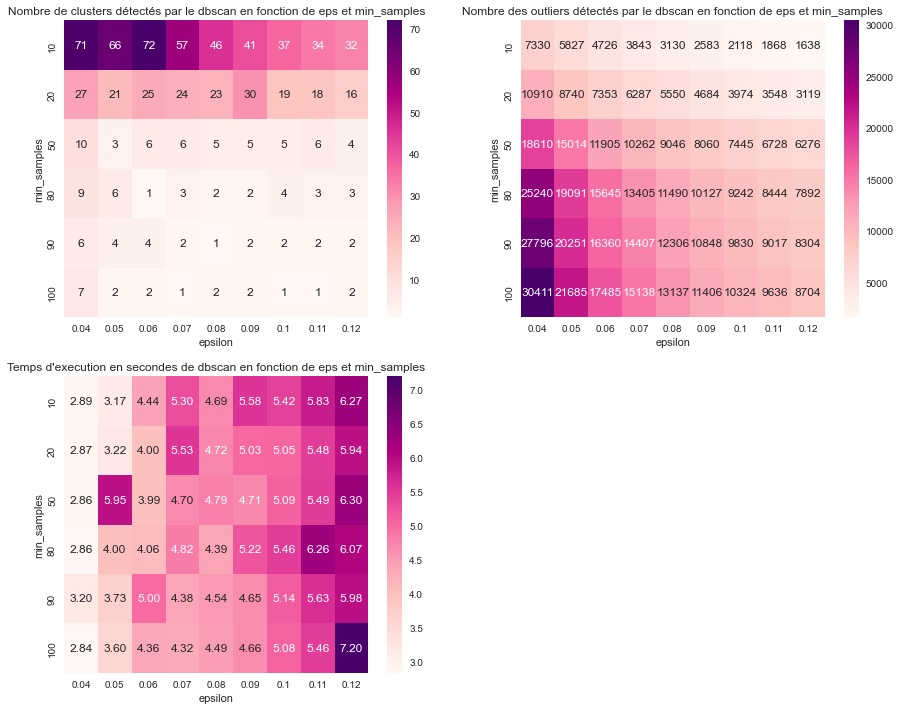

In [57]:
fig = plt.figure(figsize=(15,12))
plt.subplot(221)
sns.heatmap(pivot_1, annot=True, fmt='d', cmap='RdPu')
plt.title('Nombre de clusters détectés par le dbscan en fonction de eps et min_samples')
plt.subplot(222)
sns.heatmap(pivot_2, annot=True, fmt='d', cmap='RdPu')
plt.title('Nombre des outliers détectés par le dbscan en fonction de eps et min_samples')
plt.subplot(223)
sns.heatmap(pivot_3, annot=True, fmt='.2f', cmap='RdPu')
plt.title('Temps d\'execution en secondes de dbscan en fonction de eps et min_samples')
plt.show()

# fig.savefig('dbscan_grid.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="2_1_4"></a>

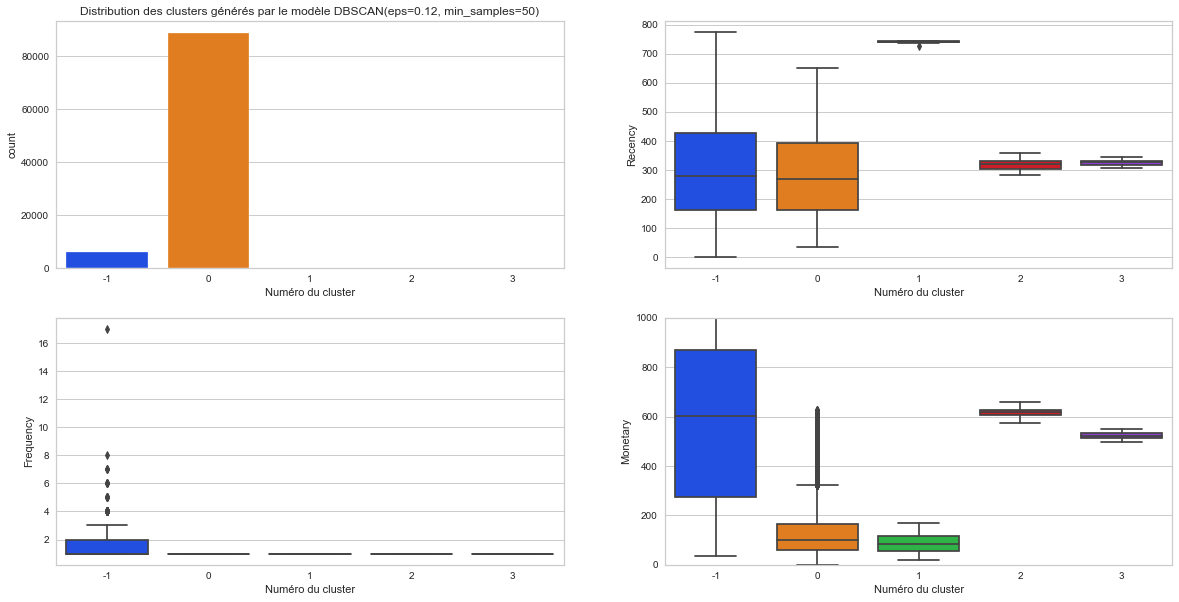

In [58]:
db_opt = DBSCAN(eps=0.12, min_samples=50).fit(X_std_1)
labels_5 = db_opt.labels_

# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,10))

plt.subplot(221)
sns.set_palette(palette)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {db_opt}')
sns.countplot(data = rfm, x = labels_5)

plt.subplot(222)
sns.boxplot(data = rfm, y = 'Recency', x = labels_5)
plt.xlabel('Numéro du cluster')

plt.subplot(223)
sns.boxplot(data = rfm, y = 'Frequency', x = labels_5)
plt.xlabel('Numéro du cluster')

plt.subplot(224)
sns.boxplot(data = rfm, y = 'Monetary', x = labels_5)
plt.xlabel('Numéro du cluster')
plt.ylim(0,1000)
plt.show()

# fig.savefig('fig_5.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="2_1_5"></a>

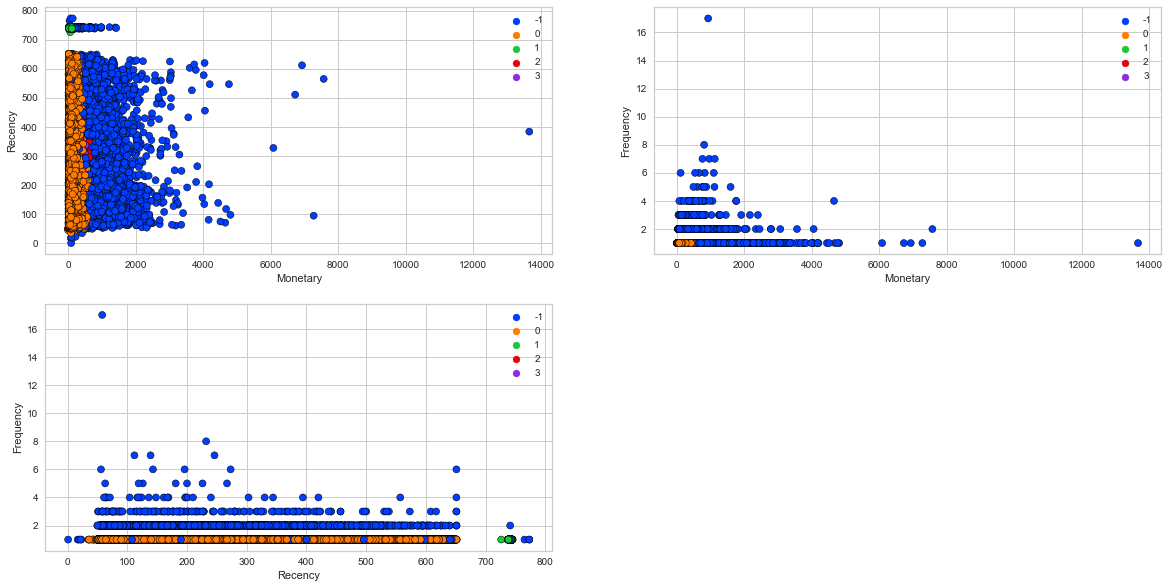

In [59]:
# Visualisations des clusters générés par le dbscan

fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.scatterplot(data=rfm, x='Monetary', y='Recency', hue=labels_5,**kwargs, palette=palette)

plt.subplot(222)
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue=labels_5,**kwargs, palette=palette)

plt.subplot(223)
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue=labels_5,**kwargs, palette=palette)
plt.show()

# fig.savefig('fig_5_scatter.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 3d <a class="anchor" id="2_1_7"></a>

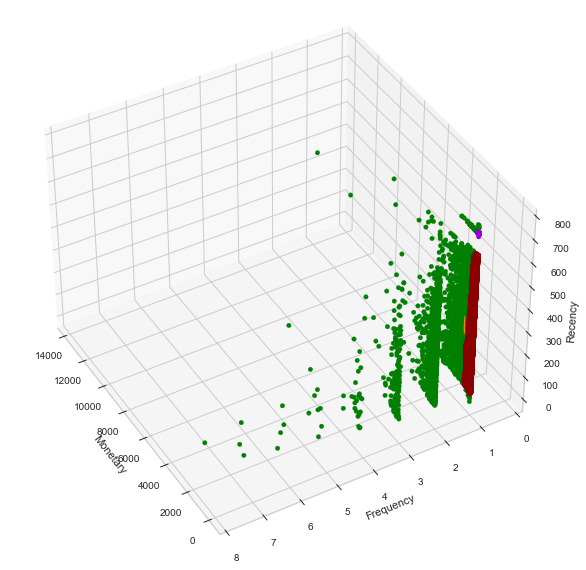

In [60]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c=labels_5, cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=150)
plt.show()

In [61]:
data_label_5 = rfm[['Recency', 'Frequency', 'Monetary']].copy()
data_label_5['label'] = labels_5
data_label_5.groupby('label').mean().merge(data_label_5.groupby('label').agg(count=('label', 'count')), on='label').\
reset_index()

label     Recency  Frequency    Monetary  count
0     -1  305.647546   1.444073  691.024713   6276
1      0  286.216854   1.000000  127.534442  88691
2      1  741.000000   1.000000   88.361848    211
3      2  320.062069   1.000000  617.792759    145
4      3  325.750000   1.000000  522.427500     56

### Caractéristiques des clusters

Ce modèle a détecté 4 clusters qui sont très déséquilibrés :

**Cluster 0** : ce cluster contient la majorité des clients soit 88 691 clients, ils ont dépensé environ 127 (mois que la moitié de la moyenne) et ils ont une récence moyenne d'environ 266 jours.

**Cluster 1** : ce cluster contient très peu de clients (211 clients) qui sont les plus anciens (récence moyenne de 617 jours) et qui ont dépensé 88 soit moins que 1/3 de la moyenne des dépenses de tous les clients.

**Cluster 2** : ce cluster contient très peu de clients (145 clients) qui sont les anciens (récence moyenne de 320 jours) et qui ont dépensé le plus par rapport aux clients des autres clusters (617).

**Cluster 3** : ce cluster contient le moins de clients (56 clients) qui ont commandé il y a mois qu'un an (récence moyenne 325 jours) et qui ont dépensé plus que la moyenne 522.

**Les outliers** (6 276) : l'algorithme a considéré que les clients qui ont dépénsé beaucoup ou qui ont commandé plus que 2 fois comme des outliers, en plus le nombre détécté est non négligeable, donc cette algorithme n'est pas adapté avec ce jeu de données.

<a href="#sommaire" rev="footnote">&#8617;</a>

#  3. Agglomerative Clustering <a class="anchor" id="3"></a>

##  3.1 Application sur les données (Recency, Frequency, Monetary)<a class="anchor" id="3_1"></a>

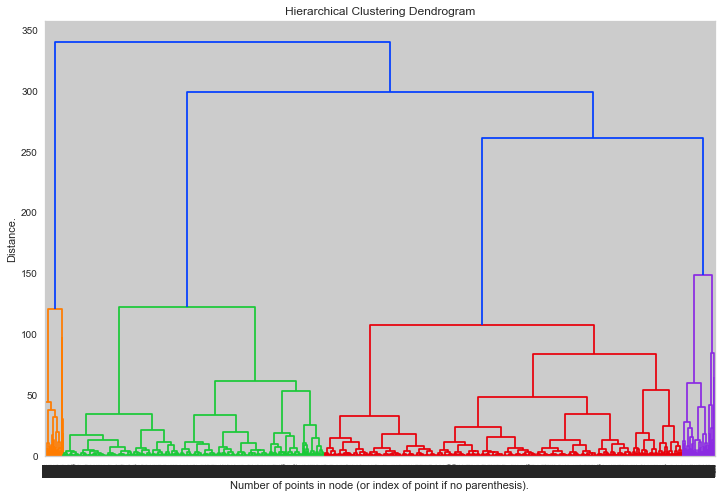

CPU times: total: 21min 55s
Wall time: 40min 40s


In [62]:
%%time 

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_std_1[:70000, :], method="ward")
    
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

dendo = dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 1d <a class="anchor" id="3_1_4"></a>

In [63]:
from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=4 , linkage='ward')
agg_clust.fit(X_std_1[:70000, :])

AgglomerativeClustering(n_clusters=4)

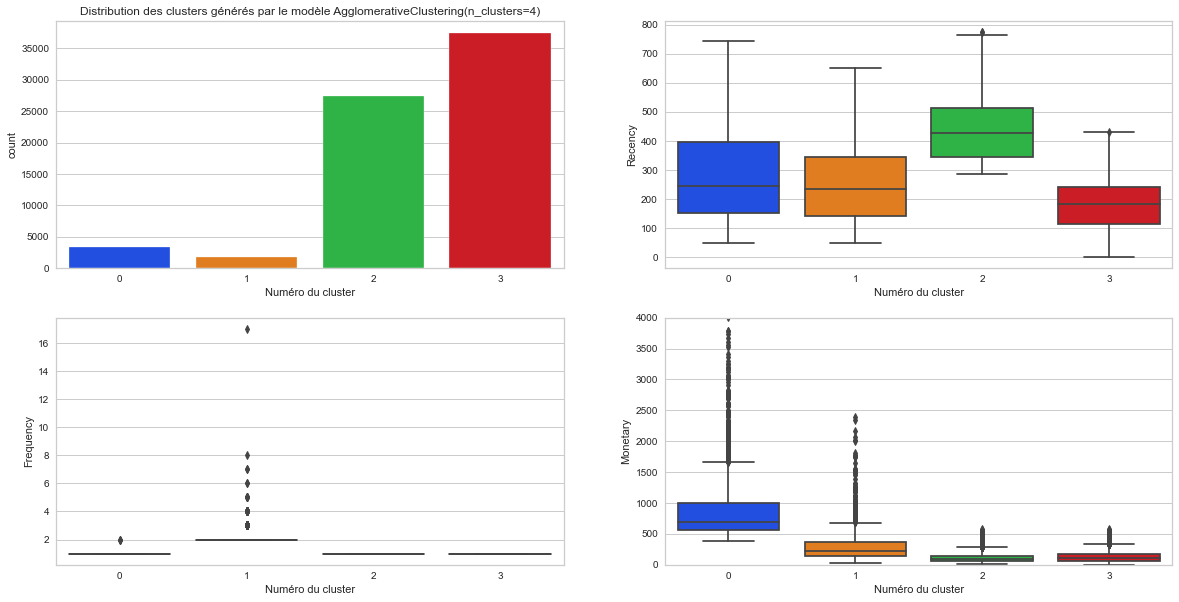

In [64]:
labels_6 = agg_clust.labels_

# Visualisations des clusters générés par le kmeans
fig = plt.figure(figsize = (20,10))

plt.subplot(221)
sns.set_palette(palette)
plt.xlabel('Numéro du cluster')
plt.title(f'Distribution des clusters générés par le modèle {agg_clust}')
sns.countplot(data = rfm.iloc[:70000, :], x = labels_6)

plt.subplot(222)
sns.boxplot(data = rfm.iloc[:70000, :], y = 'Recency', x = labels_6)
plt.xlabel('Numéro du cluster')

plt.subplot(223)
sns.boxplot(data = rfm.iloc[:70000, :], y = 'Frequency', x = labels_6)
plt.xlabel('Numéro du cluster')

plt.subplot(224)
sns.boxplot(data = rfm.iloc[:70000, :], y = 'Monetary', x = labels_6)
plt.xlabel('Numéro du cluster')
plt.ylim(0,4000)
plt.show()

# fig.savefig('fig_6.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des clusters en 2d <a class="anchor" id="3_1_5"></a>

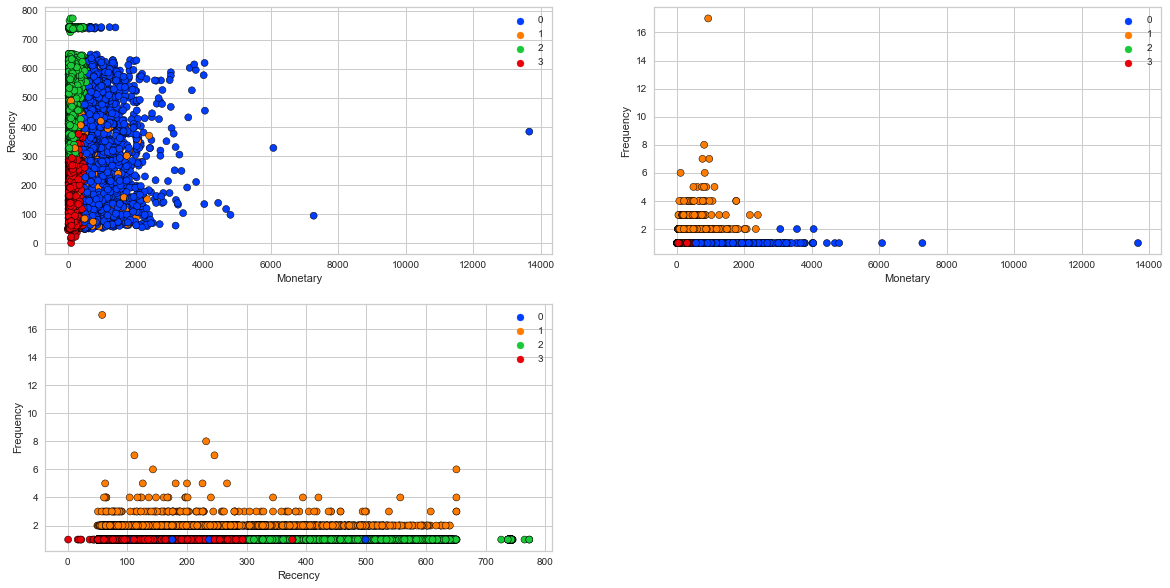

In [65]:
# Visualisations des clusters générés par le kmeans

fig = plt.figure(figsize=(20,10))
plt.subplot(221)
sns.scatterplot(data=rfm.iloc[:70000, :], x='Monetary', y='Recency', hue=labels_6,**kwargs, palette=palette)

plt.subplot(222)
sns.scatterplot(data=rfm.iloc[:70000, :], x='Monetary', y='Frequency', hue=labels_6,**kwargs, palette=palette)

plt.subplot(223)
sns.scatterplot(data=rfm.iloc[:70000, :], x='Recency', y='Frequency', hue=labels_6,**kwargs, palette=palette)
plt.show()

# fig.savefig('fig_6_scatter.png')

### Visualisation des clusters en 3d <a class="anchor" id="3_1_7"></a>

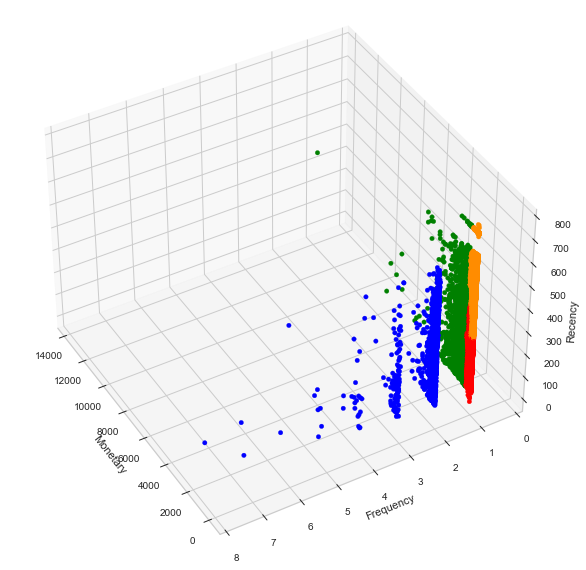

In [66]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection="3d")
rfm_ = rfm.iloc[:70000, :]
ax.scatter3D(rfm_.Monetary, rfm_.Frequency, rfm_.Recency, c=labels_6, cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=150)
plt.show()

In [67]:
data_label_6 = rfm.iloc[:70000, :][['Recency','Frequency','Monetary']].copy()
data_label_6['label'] = labels_6
data_label_6.groupby('label').mean().merge(data_label_6.groupby('label').agg(count=('label', 'count')), on='label')\
.reset_index()

label     Recency  Frequency    Monetary  count
0      0  278.331737   1.000898  878.594632   3340
1      1  254.972654   2.109383  299.365485   1865
2      2  437.910823   1.000000  113.920403  27350
3      3  181.759647   1.000000  132.466720  37445

### Caractéristiques des clusters

Ce modèle est très couteux (entraînement du modèle avec 70% des données) et il a donné 4 clusters qui sont déquilibrés :

**Cluster 0** : ce cluster regroupe 3 340 clients. Ce cluster regroupe les clients qui ont dépensé le plus (878 soit plus que 2 fois que la moyenne global). La majorité de ces clients ont commandé une seule fois et ils ont une récence moyenne de 278 soit 9 mois et 5 jours.

**Cluster 1** : ce cluster regroupe 1 865 clients. Il regroupe les clients qui ont commandé plus de 2 fois. Ces clients ont dépensé légèrement plus que la moyenne (299) et ils ont une récence moyenne de 254 jours soit 8 mois et 11 jours.

**Cluster 2** : ce cluster regroupe 27 350 clients. Il regroupe les client qui sont anciens (récence moyenne de 437 jours) et qui ont dépensé peu (total des dépenses est de 113 en moyenne) et ils ont commandé seulement une fois.

**Cluster 3** : ce cluster regroupe 37 445 clients. Il regoupe les nouveaux clients (récence moyenne d'environ 181 jours soit 6 mois) qui ont dépensé peu (132 soit moins que la moyenne global) et qui ont commandé seulement une fois.

*Conclusion* : ce modèle n'est pas adapté à ce jeu de données.

<a href="#sommaire" rev="footnote">&#8617;</a>

# 4. Choix du modèle<a class="anchor" id="4"></a>

## 4.1 Comparaison de la silhouette cluster de chaque modèle<a class="anchor" id="4_1"></a>

In [68]:
silhouette_all_models = [silhouette_score(X_std_1, labels_1), 
                        silhouette_score(X_std_2, labels_2),
                        silhouette_score(X_std_3, labels_3),
                        silhouette_score(X_std_4, labels_4)] 

In [69]:
pd.set_option('display.max_colwidth', None) # afficher tout le texte d'une colonne
pd.options.display.float_format = '{:,.3f}'.format # pour afficher 3 nombres après le virgule

model_names = ['kmeans_1','kmeans_2','kmeans_3','kmeans_4']
model = [str(eval(x))[:-17]+')' for x in model_names]
variables_fit = ['Recency -- Frequency -- Monetary',
                 'Recency -- Frequency -- Monetary -- review_note_mean',
                 'Recency -- Frequency -- Monetary -- review_note_mean -- N_products',
                 'log(Recency) -- log(Frequency) -- log(Monetary)']


pd.DataFrame({'Model_name': model_names,
              'Silhouette_score' : silhouette_all_models,
              'Model' : model,
             'Variables' : variables_fit})

Model_name  Silhouette_score                 Model  \
0   kmeans_1             0.488  KMeans(n_clusters=4)   
1   kmeans_2             0.418  KMeans(n_clusters=5)   
2   kmeans_3             0.396  KMeans(n_clusters=5)   
3   kmeans_4             0.376  KMeans(n_clusters=4)   

                                                            Variables  
0                                    Recency -- Frequency -- Monetary  
1                Recency -- Frequency -- Monetary -- review_note_mean  
2  Recency -- Frequency -- Monetary -- review_note_mean -- N_products  
3                     log(Recency) -- log(Frequency) -- log(Monetary)

<a href="#sommaire" rev="footnote">&#8617;</a>

## 4.2 Comparaison de la silhouette score des clusters de chaque modèle<a class="anchor" id="4_2"></a>

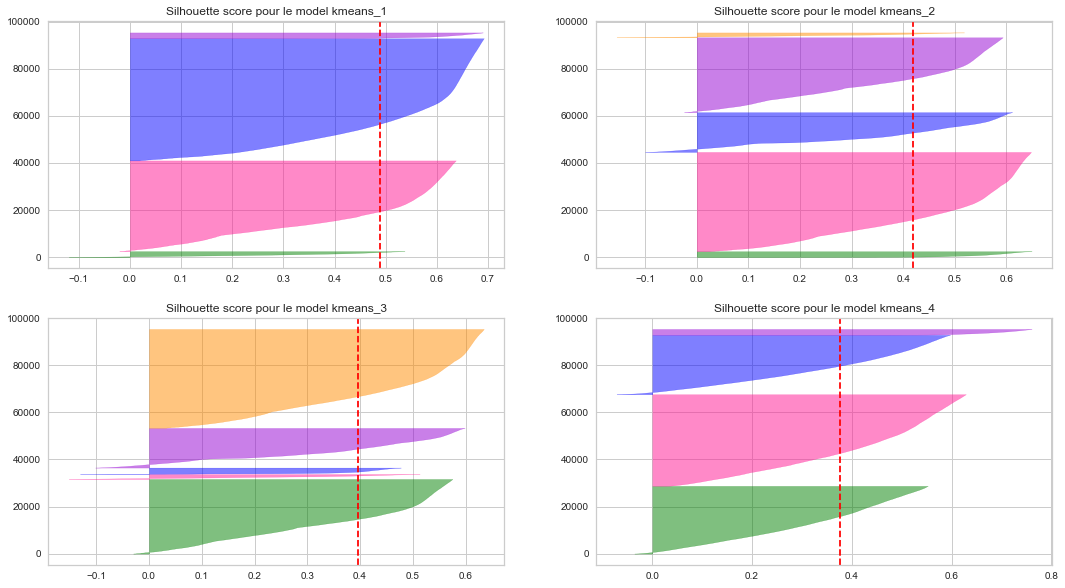

In [70]:
colors = ["green",'deeppink', "blue", "darkviolet", 'darkorange', "red", 'yellow']

fig = plt.figure(figsize=(18,10))
plt.subplot(221)
visualiser1 = SilhouetteVisualizer(kmeans_1, colors=colors)
visualiser1.fit(X_std_1)
plt.title('Silhouette score pour le model kmeans_1')

plt.subplot(222)
visualiser2 = SilhouetteVisualizer(kmeans_2, colors=colors)
visualiser2.fit(X_std_2)
plt.title('Silhouette score pour le model kmeans_2')

plt.subplot(223)
visualiser3 = SilhouetteVisualizer(kmeans_3, colors=colors)
visualiser3.fit(X_std_3)
plt.title('Silhouette score pour le model kmeans_3')

plt.subplot(224)
visualiser4 = SilhouetteVisualizer(kmeans_4, colors=colors)
visualiser4.fit(X_std_4)
plt.title('Silhouette score pour le model kmeans_4')

plt.show()

# fig.savefig('allsil.png')

<a href="#sommaire" rev="footnote">&#8617;</a>

## 4.3 Stabilité du modèle optimal<a class="anchor" id="4_3"></a>

In [71]:
model_opt = kmeans_4
model_opt

KMeans(n_clusters=4, random_state=0)

In [72]:
data_label_opt = data_label_4.copy()
data_label_4.groupby('label').agg({'Recency':['mean'],
                                   'Frequency':['mean'], 
                                   'Monetary':['mean'], 
                                   'label':'count'})

Recency Frequency Monetary  label
         mean      mean     mean  count
label                                  
0     336.473     1.000  319.743  28754
1     366.846     1.000   69.255  38917
2     116.130     1.000  123.294  25202
3     257.756     2.112  314.901   2506

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import adjusted_rand_score, homogeneity_score, adjusted_mutual_info_score

def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.3f}"
                        "\t{:.3f}")
    print(formatter_result.format(*results))   

In [74]:
print("Scores de stabilité à l'initialisation")
print(38 * '_')
print('Iteration\tFitTime\tHomo\tARI')
print(38 * '_')

for i in range(10):
    imodel = KMeans(n_clusters = 4, n_init = 2, init = "k-means++")
    bench_k_means(model = imodel, 
                  name = "Iter " + str(i), 
                  data = rfm_log[['Recency','Frequency','Monetary']], 
                  labels = labels_4)

print(38 * '_')

Scores de stabilité à l'initialisation
______________________________________
Iteration	FitTime	Homo	ARI
______________________________________
Iter 0   	0.079s	0.980	0.990
Iter 1   	0.075s	0.969	0.982
Iter 2   	0.097s	0.963	0.977
Iter 3   	0.127s	0.984	0.992
Iter 4   	0.101s	0.987	0.993
Iter 5   	0.122s	0.961	0.976
Iter 6   	0.122s	0.983	0.992
Iter 7   	0.115s	0.962	0.976
Iter 8   	0.130s	0.978	0.989
Iter 9   	0.115s	0.984	0.993
______________________________________


<a href="#sommaire" rev="footnote">&#8617;</a>

# Création des plots 3d avec animation

    import matplotlib.animation as animation
    animation.writers.list()

    def rotate(angle):

        ax.view_init(azim=angle)
    
    fig = plt.figure(figsize=(10,10))
    ax=plt.axes(projection="3d")
    ax.scatter3D(rfm.Monetary, rfm.Frequency, rfm.Recency, c=labels_5, cmap=cmap,s=20, alpha=1)
    ax.set_xlabel('Monetary')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Recency')
    plt.ylim(0,8)
    plt.title(f'Visualisation des clusters issus du modèle: {db_opt}')
    ax.view_init(elev=40, azim=150)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
    rot_animation.save('model_5.gif', dpi=80, writer='pillow')

<a href="#sommaire" rev="footnote">&#8617;</a>

In [76]:
t_final = time() - t_init
t_final

12323.745543718338

In [77]:
print(f'{t_final/60} minutes')

205.3957590619723 minutes
